# **Employee Attrition Analytics**

### **Employee Attrition Prediction using Python - Capstone Project** 

Group Members:
1.   Avtar Singh
2.   Nirmal Tom
3.   Pranav KD
4.   SaiKumar

# 1.0 Introduction

This project gives an overview of the attrition analysis for a consulting firm and allows us to understand and identify factors that help in retaining employees.

Employee attrition refers to the loss of employees through several circumstances, such as resignation and retirement. The cause of attrition may be either voluntary or involuntary. Each industry has its own standards for acceptable attrition rates. Due to the expenses associated with training new employees, any type of employee attrition is typically seen to have a monetary cost.
Attrition rate at any organization for a given month is calculated as the total number of employees leaving the firm divided by the total headcount for that month.


## 1.1 Overview of the problem

We have been provided with the files containing complete staff utilization reports for all employees of the XYZ Corp. through 2016-2018.

The data contains details of employees as well as the details of the projects that they have worked on in the last two years.

The other file contains all the attrition in the organization for the years 2015-18 with details such as reason of attrition along with other employee details. 

The data should be divided into train and test data set. We have to use the training data to build models/analytical solution and finally apply it to test data to measure the performance and robustness of the models.


## 1.2 Objective

There are three main objectives for this analysis.

*   •	Identify factors influencing attrition
*   •	Predict possible attritions
*   •	Identify possible ways to retain high performers

## 1.3 Implementation and Techniques


The dataset contains information on the Employee Number, Employee Name, Profit centre, Position, Location, Category, Supervisor name, join date, Termination date if resigned and current status of various Employees. It also contains monthly project details for 2 years.

The other file contains all the attrition in the organization for the years 2015-18 with details such as reason of attrition along with other employee details.


The cleaned data would be analyzed using EDA techniques and Customer segmentation techniques (such as clustering) in order to implement the objectives(mentioned in 1.2).

A Probabilistic Classification approach such as Logistic Regression would help identify the variable importance in determining Employee attrition. 

Clustering techniques can be employed to better group high performers

# 2.0 Packages Required


In [237]:
# importing libraries


import pandas as pd  # for dataframes
import numpy as np

import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline

import seaborn as sns # for plotting graphs
sns.set(style= "darkgrid")


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pandas.api.types import CategoricalDtype 


import warnings
warnings.filterwarnings('ignore')

# importing libraries


import pandas as pd  # for dataframes
import numpy as np

import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline

import seaborn as sns # for plotting graphs
sns.set(style= "darkgrid")


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pandas.api.types import CategoricalDtype 


import warnings
warnings.filterwarnings('ignore')


from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from matplotlib import pyplot
import pylab as pl

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string


# 3.0 Data Preparation


## 3.1 Original Data Source

Original Data Source can be found [here](https://github.com/Nirmalytics/Employee-Attrition-Analytics/blob/8399c1647e95e2c1c0e745bf31d5f0039040f6db/HR_Analytics.zip)


## 3.2 Explanation of Source Data


The data comes from XYZ Corp. and the 2 Excel files (__Utilization dataset__) contain complete staff utilization reports for all employees through 2016-2018. This data contains details of employees as well as the details of the projects that they have worked on in the last two years.

The other Excel file (__Termination dataset__) contains all the attrition in the organization for the years 2015-18 with details such as reason of attrition along with other employee details.
___

The __Utilization dataset__ contains information on  

Employee Number, 

Employee Name, 

Profit centre, 

Employee Position, 

Employee Location, 

People Group, 

Employee Category, 

Supervisor name, 

join date, 

Termination date(of resigned) and 

current status of various Employees.
____


It also contains ***monthly project details*** like 

Total Hours, 

Total Available Hours, 

Work Hours, 

Leave Hours, 

Training Hours, 

BD hours, 

NC hours, 

Utilization% 

for 2 years from Aprill 2016 to March 2017 and Total value for each employees.
___


**The source data - (staff utlz latest 16-17_masked) has 789 observations and 115 variables**

**The source data - (staff utlz latest 17-18_masked) has 973 observations and 115 variables**

**The Terminations 15-18 dataset contains 293 observations and 9 variables**

The variable Employee Number is a unique id, and we can see  duplicate values of this column, across Utilization Source datasett of those active employees.

We can describe attributes in detail as:

Employee No: Unique idetifier for each employee

Office Location: Management-oriented organizational unit of the organization for the purpose of internal control

Employee Name: Name of Employee (Masked)

Employee Position: Employee designation within the organization

Employee Location: City in which employee is based out of

People Group: Employee type (client facing employee or support staff such as HR, payrolll, etc).

Employee Category: Refers to status of employee such as part-time employee, full time employee, awaiting termination

Supervisor name:Manager of the said employee

Join Date: Joining date of employye in XYZ Corp.

Current Status: Current status of employee (Active, Resigned, etc)

## 3.3 Creation of Master Dataset and its Import


In order to build models/analytical solutions, we have to create a MasterDataset from Utilization_Source dataset.
The steps performed is displayed as follows:

**Step 1 :** ***Modified Utilization datasets***.

we dropped 96 variables on Monthly Project details like

Total Hours, Total Available Hours, Work Hours, Leave Hours, Training Hours, BD hours, NC hours, Utilization% of 2 years from Aprill 2016 to March 2017 and retained only Total value of each aforementioned variables of each employees on both excel files to reduce dimensionality.

This reduced the variables from 115 to 19 on each Excel files.


**Step 2 :** ***combined dataset***

 We Joined cells On Unique Employee Number of Modified Utilization dataset to create a combined dataset.

Except Employee number, we have duplicated seperate x,y cols for each variables for 16-17 and 17-18 excelsheets which can be found [here](https://docs.google.com/spreadsheets/d/1L1r2czanb1OZa8JOW6emyzfNmEgJxFL9/edit?usp=sharing&ouid=108834755531948847016&rtpof=true&sd=true)

Now we have 1111 rows and 37 columns.



**Step 3 :** Creation of a Final_Dataset


*   We combined seperate x, y features of Employee Name, Profit centre, Employee 
Position, Employee Location, People Group, Employee Category, Supervisor name, CurrentStatus with the last Updated value which reduced dimensionality by 8 values.

* we also extracted a new variable - **" TenureYears "** (Tenure in years) substracting Termination date (of resigned employees) from Join date.
2018 is selected as the basedate for finding TenureYears of active employees.

*   We combined seperate x, y features of Total Hours, Total Available Hours, Work Hours, Leave Hours, Training Hours, BD hours, NC hours, Utilization% together by taking average, which reduced the dimensionality by 8 values.

*  a New variable named **" TotalNonbilled "** which is the total sum of training hours, BD hours and NC hours was Feature engineered to reflect total Non billed hours.

* 5 New Variables namely **PC_Change_Yes, Position_Promoted_Yes, Location_changed_yes,	Employee Category_Change_yes,	Supervisor_change_Yes** were created to check whether there is a transistion of values happened with profit centre, position, location, category, supervisor in the combined dataset.

*   A **target** field is created from CurrentStatus to identify whether an employee resigned or not. For resigned value is 1, otherwise 0.

***Dimensionality of Master Dataset = 1111 Rows, 25 Columns.***

## 3.4 Dropped columns from source data


1.    96 variables on Monthly Project details like
Total Hours, Total Available Hours, Work Hours, Leave Hours, Training Hours, BD hours, NC hours, Utilization% of 2 years from Aprill 2016 to March 2017

2.   Join Date and Termination Date (Tenure is extracted from these variables)



## 3.5 Feature Engineered variables from source data



1.   **TenureYears**  = Termination date (of resigned employees) - Join date.
2018 is selected as the basedate for finding TenureYears of active employees.

2.   **TotalNonbilled** = Training hours + BD hours + NC hours

3. **PC_Change_Yes** = Profit_centre changed or not, if yes 1, else 0.

4. **Position_Promoted_Yes** = Position changed or not, if yes 1, else 0.

5. **Location_changed_yes** = Location changed or not, if yes 1, else 0.

6. **Employee Category_Change_yes** = Category changed or not, if yes 1, else 0.

7. **Supervisor_change_Yes** = Supervisor changed or not, if yes 1, else 0.


*Let's first load the Master dataset using pandas's read CSV function.*

In [238]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/My Drive/Nirmal")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
#importing data
data = pd.read_excel("Final_EA_dataset.xlsx")

# display max_columns to 50
pd.set_option('display.max_columns' ,50)
pd.set_option('display.max_colwidth', None)


#first 5 instances using "head()" function
data.head()


Employee No      Employee Name Last_Profit_Center Last_Employee_Position  \
0          1.0   Rochette Jilleen             PC - 1                Level 1   
1          2.0     Daryl Natalina             PC - 2                Level 2   
2          3.0  Annnora Gabrielle             PC - 2                Level 2   
3          4.0        Barbee Joey             PC - 3                Level 2   
4          5.0   Idalina Lauraine             PC - 4                Level 1   

  Last_Location Last_Category   Last_Supervisor     Last_People_Group  \
0    Location 3        SVP/VP  Idalina Lauraine  Client Service Staff   
1    Location 7        SVP/VP  Idalina Lauraine  Client Service Staff   
2    Location 7        SVP/VP  Idalina Lauraine  Client Service Staff   
3    Location 1      Resigned  Idalina Lauraine  Client Service Staff   
4    Location 3     Level 1/2     Abagail Druci  Client Service Staff   

   TenureYears  Total_hours  Total_Available_Hours  Total_Work_Hours  \
0    17.500000       2084.0                1833.25            542.00   
1    18.833333       2084.0                1875.00            638.75   
2    17.166667       2084.0                1809.25           1088.75   
3    17.333333       1964.0                1745.75            273.00   
4    19.750000       1312.0                1205.00            149.00   

   Total_Leave_Hours  Total_Training_Hours  Total_BD_Hours  Total_NC_Hours  \
0              202.0                 48.75         1311.75           37.00   
1              182.0                 27.00          647.25          665.25   
2              241.0                 33.75          485.25          453.50   
3              202.0                 16.25         1371.50          139.50   
4              104.0                  3.00         1159.00          818.00   

   Total_Utilization%  TotalNonbilled  PC_Change_Yes  Position_Promoted_Yes  \
0            0.296610         1397.50            0.0                    1.0   
1            0.340837         1339.50            0.0                    0.0   
2            0.605539          972.50            0.0                    0.0   
3            0.156950         1527.25            0.0                    0.0   
4            0.123651         1980.00            0.0                    0.0   

   Location_changed_yes  Employee Category_Change_yes  Supervisor_change_Yes  \
0                   0.0                           1.0                    0.0   
1                   0.0                           1.0                    0.0   
2                   0.0                           1.0                    0.0   
3                   0.0                           1.0                    0.0   
4                   0.0                           0.0                    0.0   

  CurrentStatus  Target  
0        Active       0  
1        Active       0  
2        Active       0  
3      Resigned       1  
4        Active       0

## 3.6 Cleaned Master Dataset


In [240]:
list(data.columns)

['Employee No',
 'Employee Name',
 'Last_Profit_Center',
 'Last_Employee_Position',
 'Last_Location',
 'Last_Category',
 'Last_Supervisor',
 'Last_People_Group',
 'TenureYears',
 'Total_hours',
 'Total_Available_Hours',
 'Total_Work_Hours',
 'Total_Leave_Hours',
 'Total_Training_Hours',
 'Total_BD_Hours',
 'Total_NC_Hours',
 'Total_Utilization%',
 'TotalNonbilled',
 'PC_Change_Yes',
 'Position_Promoted_Yes',
 'Location_changed_yes',
 'Employee Category_Change_yes',
 'Supervisor_change_Yes',
 'CurrentStatus',
 'Target']

In [241]:
DataCopy = data.copy()  #temp copy

## 3.7 Summary of the Variables


In [242]:
# reading data dictionary file

DataDict = pd.ExcelFile('DataDictionary.xlsx')
Util = pd.read_excel(DataDict, 'Staff_Utlilization_Report')
resig = pd.read_excel(DataDict, 'Terminations')

In [243]:
with pd.option_context('display.max_colwidth', None):
  display(Util)


Column Name  \
0                    Employee No   
1             Last_Profit_Center   
2                  Employee Name   
3         Last_Employee_Position   
4                  Last_Location   
5              Last_People_Group   
6                  Last_Category   
7                Last_Supervisor   
8                  CurrentStatus   
9                    Total_hours   
10         Total_Available_Hours   
11              Total_Work_Hours   
12             Total_Leave_Hours   
13          Total_Training_Hours   
14                Total_BD_Hours   
15                Total_NC_Hours   
16            Total_Utilization%   
17                   TenureYears   
18                TotalNonbilled   
19                 PC_Change_Yes   
20         Position_Promoted_Yes   
21          Location_changed_yes   
22  Employee Category_Change_yes   
23         Supervisor_change_Yes   

                                                                                                                       Description  
0                                                                                               Unique idetifier for each employee  
1                                  Management-oriented organizational unit of the organization for the purpose of internal control  
2                                                                                                        Name of Employee (Masked)  
3                                                                                     Employee designation within the organization  
4                                                                                           City in which employee is based out of  
5                                                Employee type (client facing employee or support staff such as HR, payrolll, etc)  
6                                Refers to status of employee such as part-time employee, full time employee, awaiting termination  
7                                                                                                     Manager of the said employee  
8                                                                               Current status of employee (Active, Resigned, etc)  
9                             Total no. of chargeble hours avaibable during month (No. of working days in month X 8 hours per day)  
10                        Actual no of chageble hours available in the month for the employee (Total hours - Leave hours , if any)  
11                                                                  Actual chargebale hourse during the month reported by employee  
12                                                                                    Total leaves used by employee during a month  
13                                                                             Total hours reported under Training by the employee  
14                                                                        Total hours spent by employee under Business Development  
15                                                                                         Non chargeble hours reported by emplyee  
16                                                                                 Total utlilization of the employee during month  
17  Tenure in years (Termination date (of resigned employees) - Join date.\n2018 is selected as the basedate for active employees.  
18                                                                                       Sum of Training hours ,BD hours ,NC hours  
19                                                                                 Profit_centre changed or not, if yes 1, else 0.  
20                                                                                      Position changed or not, if yes 1, else 0.  
21                                                                                      Location changed or not, if yes 1, else 0.  
22                                                           

# 4.0 Exploratory Data Analysis


Exploratory Data Analysis is an initial process of analysis, in which we can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

#### 4.1 Dataset Description


In [244]:
#Printing all the columns present in data
data.columns

Index(['Employee No', 'Employee Name', 'Last_Profit_Center',
       'Last_Employee_Position', 'Last_Location', 'Last_Category',
       'Last_Supervisor', 'Last_People_Group', 'TenureYears', 'Total_hours',
       'Total_Available_Hours', 'Total_Work_Hours', 'Total_Leave_Hours',
       'Total_Training_Hours', 'Total_BD_Hours', 'Total_NC_Hours',
       'Total_Utilization%', 'TotalNonbilled', 'PC_Change_Yes',
       'Position_Promoted_Yes', 'Location_changed_yes',
       'Employee Category_Change_yes', 'Supervisor_change_Yes',
       'CurrentStatus', 'Target'],
      dtype='object')

In [245]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(1111, 25)

In [246]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee No                   1111 non-null   float64
 1   Employee Name                 1111 non-null   object 
 2   Last_Profit_Center            1111 non-null   object 
 3   Last_Employee_Position        1111 non-null   object 
 4   Last_Location                 1111 non-null   object 
 5   Last_Category                 1111 non-null   object 
 6   Last_Supervisor               1111 non-null   object 
 7   Last_People_Group             1111 non-null   object 
 8   TenureYears                   1111 non-null   float64
 9   Total_hours                   1111 non-null   float64
 10  Total_Available_Hours         1111 non-null   float64
 11  Total_Work_Hours              1111 non-null   float64
 12  Total_Leave_Hours             1111 non-null   float64
 13  Tot

#### 4.2 Missing values

In [247]:
data.isna().sum()

Employee No                     0
Employee Name                   0
Last_Profit_Center              0
Last_Employee_Position          0
Last_Location                   0
Last_Category                   0
Last_Supervisor                 0
Last_People_Group               0
TenureYears                     0
Total_hours                     0
Total_Available_Hours           0
Total_Work_Hours                0
Total_Leave_Hours               0
Total_Training_Hours            0
Total_BD_Hours                  0
Total_NC_Hours                  0
Total_Utilization%              0
TotalNonbilled                  0
PC_Change_Yes                   0
Position_Promoted_Yes           0
Location_changed_yes            0
Employee Category_Change_yes    0
Supervisor_change_Yes           0
CurrentStatus                   0
Target                          0
dtype: int64

In [248]:
## Variable Identification
data.dtypes

Employee No                     float64
Employee Name                    object
Last_Profit_Center               object
Last_Employee_Position           object
Last_Location                    object
Last_Category                    object
Last_Supervisor                  object
Last_People_Group                object
TenureYears                     float64
Total_hours                     float64
Total_Available_Hours           float64
Total_Work_Hours                float64
Total_Leave_Hours               float64
Total_Training_Hours            float64
Total_BD_Hours                  float64
Total_NC_Hours                  float64
Total_Utilization%              float64
TotalNonbilled                  float64
PC_Change_Yes                   float64
Position_Promoted_Yes           float64
Location_changed_yes            float64
Employee Category_Change_yes    float64
Supervisor_change_Yes           float64
CurrentStatus                    object
Target                            int64


This dataset has 1111 samples, and 25 attributes(8 integer, 9 float, and 8 objects).

No variable column has null/missing values.

 Segregating nominal and ordinal variables:

**nominal:**
*   Last_Profit_Center
*   Last_Location
*   Last_Category
*   Last_Supervisor
*   Last_People_Group

**ordinal:**

*   Last_Employee_Position


**"Target"** is the Dependent variable.

## 4.3 Target variable Analysis

In [249]:
data["Target"].value_counts(normalize = True) * 100

0    75.067507
1    24.932493
Name: Target, dtype: float64

24.93% is the target variable presence

In [250]:
Target=  data.groupby("Target")
Target.mean()

Employee No  TenureYears  Total_hours  Total_Available_Hours  \
Target                                                                 
0        598.371703     2.571942  1656.139089            1438.587434   
1        428.425993     2.385379  1145.776173            1006.240614   

        Total_Work_Hours  Total_Leave_Hours  Total_Training_Hours  \
Target                                                              
0            1103.276169         182.221523             35.956031   
1             714.291173         119.801444             19.734116   

        Total_BD_Hours  Total_NC_Hours  Total_Utilization%  TotalNonbilled  \
Target                                                                       
0            68.081235      352.007248            0.728877      456.044514   
1            31.534296      310.866047            0.657605      362.134458   

        PC_Change_Yes  Position_Promoted_Yes  Location_changed_yes  \
Target                                                               
0            0.151079               0.196643              0.051559   
1            0.111913               0.000000              0.018051   

        Employee Category_Change_yes  Supervisor_change_Yes  
Target                                                       
0                           0.111511               0.250600  
1                           0.415162               0.086643

**Insights**

 Employees who left the company had lower Tenure, low Total_Work_Hours, low Total_Leave_Hours, and low Total_Utilization% than who stayed in the company.

seggregating variables into groups


In [251]:
Project_details = ['Total_hours','Total_Available_Hours', 'Total_Work_Hours', 'Total_Leave_Hours', 'Total_Training_Hours','Total_BD_Hours', 'Total_NC_Hours', 'Total_Utilization%', 'TotalNonbilled']
Profile_details = ['Last_Profit_Center', 'Last_Employee_Position','Last_Location', 'Last_People_Group', 'Last_Category','Last_Supervisor']
Profile_tenure = ['TenureYears']
target= ['Target']

## 4.4 summary statistics of numerical data

In [252]:
data.describe().T

count         mean         std    min  \
Employee No                   1111.0   556.000000  320.862380   1.00   
TenureYears                   1111.0     2.525428    2.638401   0.00   
Total_hours                   1111.0  1528.892889  626.106732   0.00   
Total_Available_Hours         1111.0  1330.792592  557.133500 -40.00   
Total_Work_Hours              1111.0  1006.292511  580.801272   0.00   
Total_Leave_Hours             1111.0   166.658641  133.173319   0.00   
Total_Training_Hours          1111.0    31.911503   27.740244   0.00   
Total_BD_Hours                1111.0    58.969172  231.447173 -12.00   
Total_NC_Hours                1111.0   341.749721  336.001639 -14.25   
Total_Utilization%            1111.0     0.711107    0.343866   0.00   
TotalNonbilled                1111.0   432.630396  401.854803   0.00   
PC_Change_Yes                 1111.0     0.141314    0.348502   0.00   
Position_Promoted_Yes         1111.0     0.147615    0.354877   0.00   
Location_changed_yes          1111.0     0.043204    0.203408   0.00   
Employee Category_Change_yes  1111.0     0.187219    0.390263   0.00   
Supervisor_change_Yes         1111.0     0.209721    0.407293   0.00   
Target                        1111.0     0.249325    0.432817   0.00   

                                      25%          50%          75%      max  
Employee No                    278.500000   556.000000   833.500000  1111.00  
TenureYears                      0.750000     1.833333     3.166667    19.75  
Total_hours                   1120.000000  1784.000000  2084.000000  2088.00  
Total_Available_Hours          974.000000  1514.250000  1800.750000  2084.00  
Total_Work_Hours               544.000000  1073.000000  1481.250000  2358.00  
Total_Leave_Hours               90.000000   160.000000   216.000000  1412.00  
Total_Training_Hours            11.000000    26.000000    46.062500   146.00  
Total_BD_Hours                   0.000000     0.000000     0.000000  1945.50  
Total_NC_Hours                 104.000000   252.750000   456.750000  2357.75  
Total_Utilization%               0.526871     0.809319     0.936461     6.00  
TotalNonbilled                 157.040000   314.000000   563.625000  2367.00  
PC_Change_Yes                    0.000000     0.000000     0.000000     1.00  
Position_Promoted_Yes            0.000000     0.000000     0.000000     1.00  
Location_changed_yes             0.000000     0.000000     0.000000     1.00  
Employee Category_Change_yes     0.000000     0.000000     0.000000     1.00  
Supervisor_change_Yes            0.000000     0.000000     0.000000     1.00  
Target                           0.000000     0.000000     0.000000     1.00

Tenure Min is 0 & maximum is 19.
very right skewed.

**Univariate Analysis** ( Numerical Values)

In [253]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

Project_details Variable 

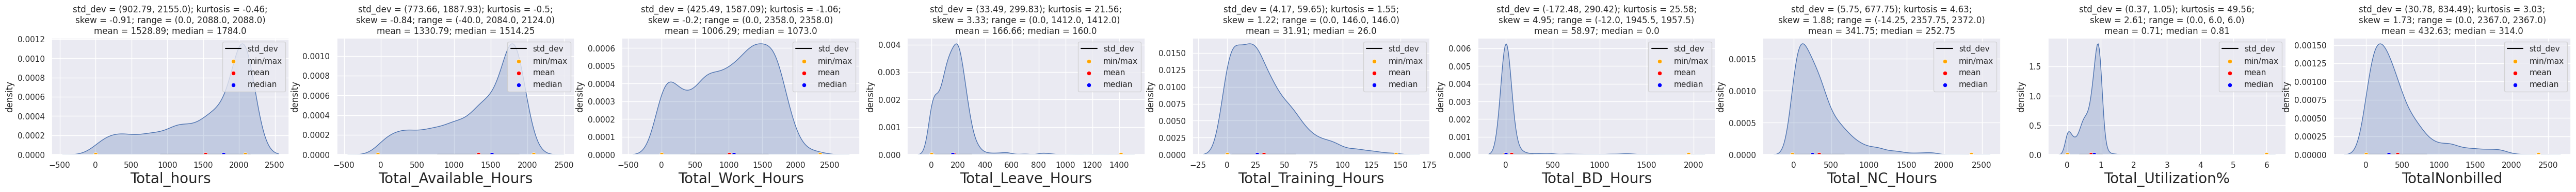

In [254]:
UVA_numeric(data,Project_details)

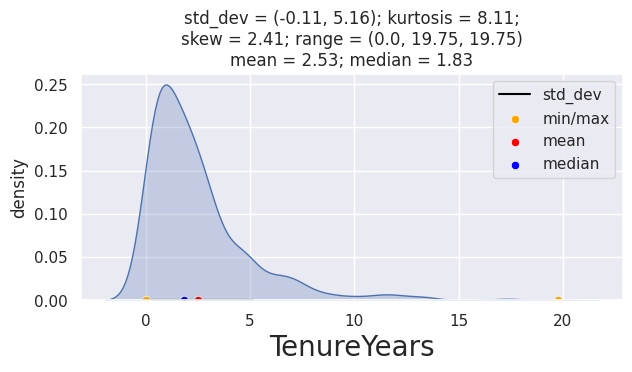

In [255]:
UVA_numeric(data,Profile_tenure)

**Summary of Project_details & Profile_tenure**

*    **Total Hours**:
    *    Median = 1800
    *    Most employees between 0 to 2088
    *    skewness -0.91 
    *    **kurtosis = -0.45**; very less likely to have extreme/outlier values.

*    **Total Available Hours**:
    *    Median = 1524.55
    *    Most employees between -40 to 2084
    *    skewness -0.84
    *    **kurtosis = -0.5**; very less likely to have extreme/outlier values.


*    **Work Hours**:
    *    Median = 1075.75
    *    Most employees between 0 to 2358
    *    skewness -0.2
    *    **kurtosis = -0.5**; very less likely to have extreme/outlier values.

*    **Leave Hours**:
    *    Median = 160
    *    Most employees between 0 to 1412
    *    skewness 3.35
    *    **kurtosis = +21.8**; extreme/outlier values.

*    **Training Hours**:
    *    Median = 26
    *    Most employees between 0 to 146
    *    skewness 1.22
    *    **kurtosis = 1.55**; small extreme/outlier values.

*    **BD hours**:
    *    Median = 0
    *    Most employees between -12 to -1945.5
    *    skewness 4.94
    *    **kurtosis = 25.45**; very extreme/outlier values.

*    **NC Hours**:
    *    Median = 252.38
    *    Most employees between  -14.25 to 2372
    *    skewness 1.89
    *    **kurtosis = 4.64**; extreme/outlier values.

*    **Utilization %**:
    *    Median = .81%
    *    Most employees between 0 to 600%
    *    skewness 2.62
    *    **kurtosis = 49.6**; very high extreme/outlier values.

*    **Tenure in years %**:
    *    Median = 2.04%
    *    Most employees between 0 to 19.45%
    *    skewness 2.24
    *    **kurtosis = 7.2**; very high extreme/outlier values.

**Univariate Analysis** ( Categorical Values)

In [256]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

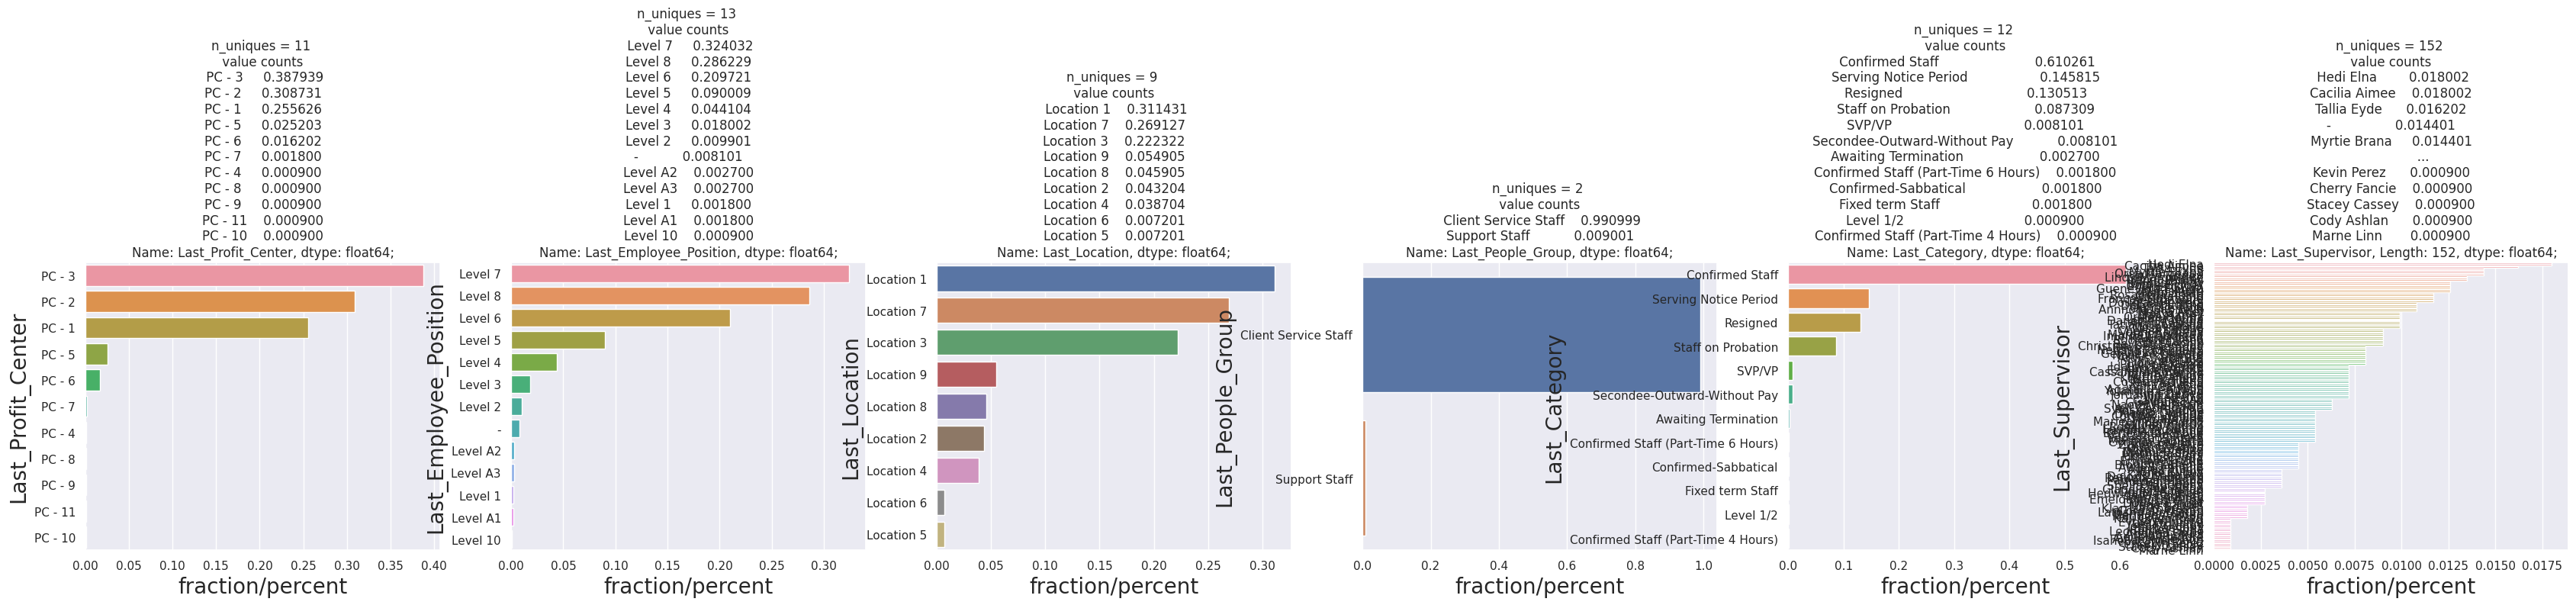

In [257]:
UVA_category(data, Profile_details)

**Summary**
* Profit centers
  * Percentage distribution 

      PC-3 : 38.87% 

      PC-2 : 30.74%

      PC-1: 25.67%

* Employee Position
 * Percentage distribution 

      Level 7 : 32.36% 

      Level 8: 28.57%

      Level 6: 20.97%

      Level 5: 9.04%

* Employee Location
 * Percentage distribution 

      Location 1 : 31.19% 

      Location 7: 26.94%

      Location 3: 22.24%

* People group
 * Percentage distribution 

      Client service staff : 99.09% 

      Support staff 7: 00.90%

* Employee category
 * Percentage distribution 

      Confirmed staff : 61.21%

      Service Notice period: 14.37%

      Resigned: 13.81%

      Probation: 8%

  *Supervisors



Out of 11 Unique profit centres only PC3, PC2, Pc1 have significant Number of employee population.

Out of 13 Unique Employee Position only Level 7,8,6,5,4 have significant Number of employee population.

Out of 9 Unique Employee locations only location 1,7,3 have significant Number of employee population.

There are 121 Unique Supervisor values



**Investigation directions from Univariate Analysis**

* **_transform_** 

  *   LH, Train Hr, BD hr, Nc Hr, Util%, Tenure because of skewed distribution.


*  Convert _ve values of TAH, BD, NC hours to zero.

***we have idenitified outliers on***
1. Leave Hours
2. TotalNonbilled
3. BD hours
4. NC hours
5. Util %
6. Tenure        

## 4.5 Bi- Variate Analysis (Continuous - Continuous variables)

In [258]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64'])[:]
numerical.dtypes

Employee No                     float64
TenureYears                     float64
Total_hours                     float64
Total_Available_Hours           float64
Total_Work_Hours                float64
Total_Leave_Hours               float64
Total_Training_Hours            float64
Total_BD_Hours                  float64
Total_NC_Hours                  float64
Total_Utilization%              float64
TotalNonbilled                  float64
PC_Change_Yes                   float64
Position_Promoted_Yes           float64
Location_changed_yes            float64
Employee Category_Change_yes    float64
Supervisor_change_Yes           float64
Target                            int64
dtype: object

In [259]:
# calculating correlation
correlation = numerical.corr()
correlation

Employee No  TenureYears  Total_hours  \
Employee No                      1.000000    -0.791751    -0.498191   
TenureYears                     -0.791751     1.000000     0.429756   
Total_hours                     -0.498191     0.429756     1.000000   
Total_Available_Hours           -0.488088     0.415710     0.980693   
Total_Work_Hours                -0.226301     0.077461     0.741827   
Total_Leave_Hours               -0.380545     0.334715     0.572846   
Total_Training_Hours             0.363725    -0.234828     0.135705   
Total_BD_Hours                  -0.249300     0.419793     0.175043   
Total_NC_Hours                  -0.281144     0.307913     0.326400   
Total_Utilization%               0.024217    -0.145604     0.247418   
TotalNonbilled                  -0.353547     0.483023     0.383095   
PC_Change_Yes                   -0.159030     0.097088     0.192946   
Position_Promoted_Yes           -0.186689     0.131415     0.261724   
Location_changed_yes            -0.047208     0.011520     0.114209   
Employee Category_Change_yes    -0.120796     0.085564    -0.020285   
Supervisor_change_Yes           -0.169812     0.106185     0.282128   
Target                          -0.229243    -0.030605    -0.352805   

                              Total_Available_Hours  Total_Work_Hours  \
Employee No                               -0.488088         -0.226301   
TenureYears                                0.415710          0.077461   
Total_hours                                0.980693          0.741827   
Total_Available_Hours                      1.000000          0.748658   
Total_Work_Hours                           0.748658          1.000000   
Total_Leave_Hours                          0.407083          0.318722   
Total_Training_Hours                       0.095460          0.171714   
Total_BD_Hours                             0.184555         -0.203582   
Total_NC_Hours                             0.340637         -0.216678   
Total_Utilization%                         0.243009          0.658878   
TotalNonbilled                             0.397700         -0.286569   
PC_Change_Yes                              0.204089          0.149053   
Position_Promoted_Yes                      0.267089          0.255676   
Location_changed_yes                       0.116282          0.106409   
Employee Category_Change_yes              -0.026999         -0.048720   
Supervisor_change_Yes                      0.274216          0.227959   
Target                                    -0.335875         -0.289874   

                              Total_Leave_Hours  Total_Training_Hours  \
Employee No                           -0.380545              0.363725   
TenureYears                            0.334715             -0.234828   
Total_hours                            0.572846              0.135705   
Total_Available_Hours                  0.407083              0.095460   
Total_Work_Hours                       0.318722              0.171714   
Total_Leave_Hours                      1.000000              0.029629   
Total_Training_Hours                   0.029629              1.000000   
Total_BD_Hours                         0.064628             -0.045821   
Total_NC_Hours                         0.114925             -0.035993   
Total_Utilization%                     0.120220              0.124880   
TotalNonbilled                         0.135360              0.012545   
PC_Change_Yes                          0.081903             -0.144118   
Position_Promoted_Yes                  0.125779             -0.067879   
Location_changed_yes                   0.058812             -0.043596   
Employee Category_Change_yes           0.045650             -0.115651   
Supervisor_change_Yes                  0.189584             -0.043662   
Target                                -0.202867             -0.253102   

                              Total_BD_Hours  Total_NC_Hours  \
Employee No                        -0.249300       -0.281

## 4.6 Heatmap

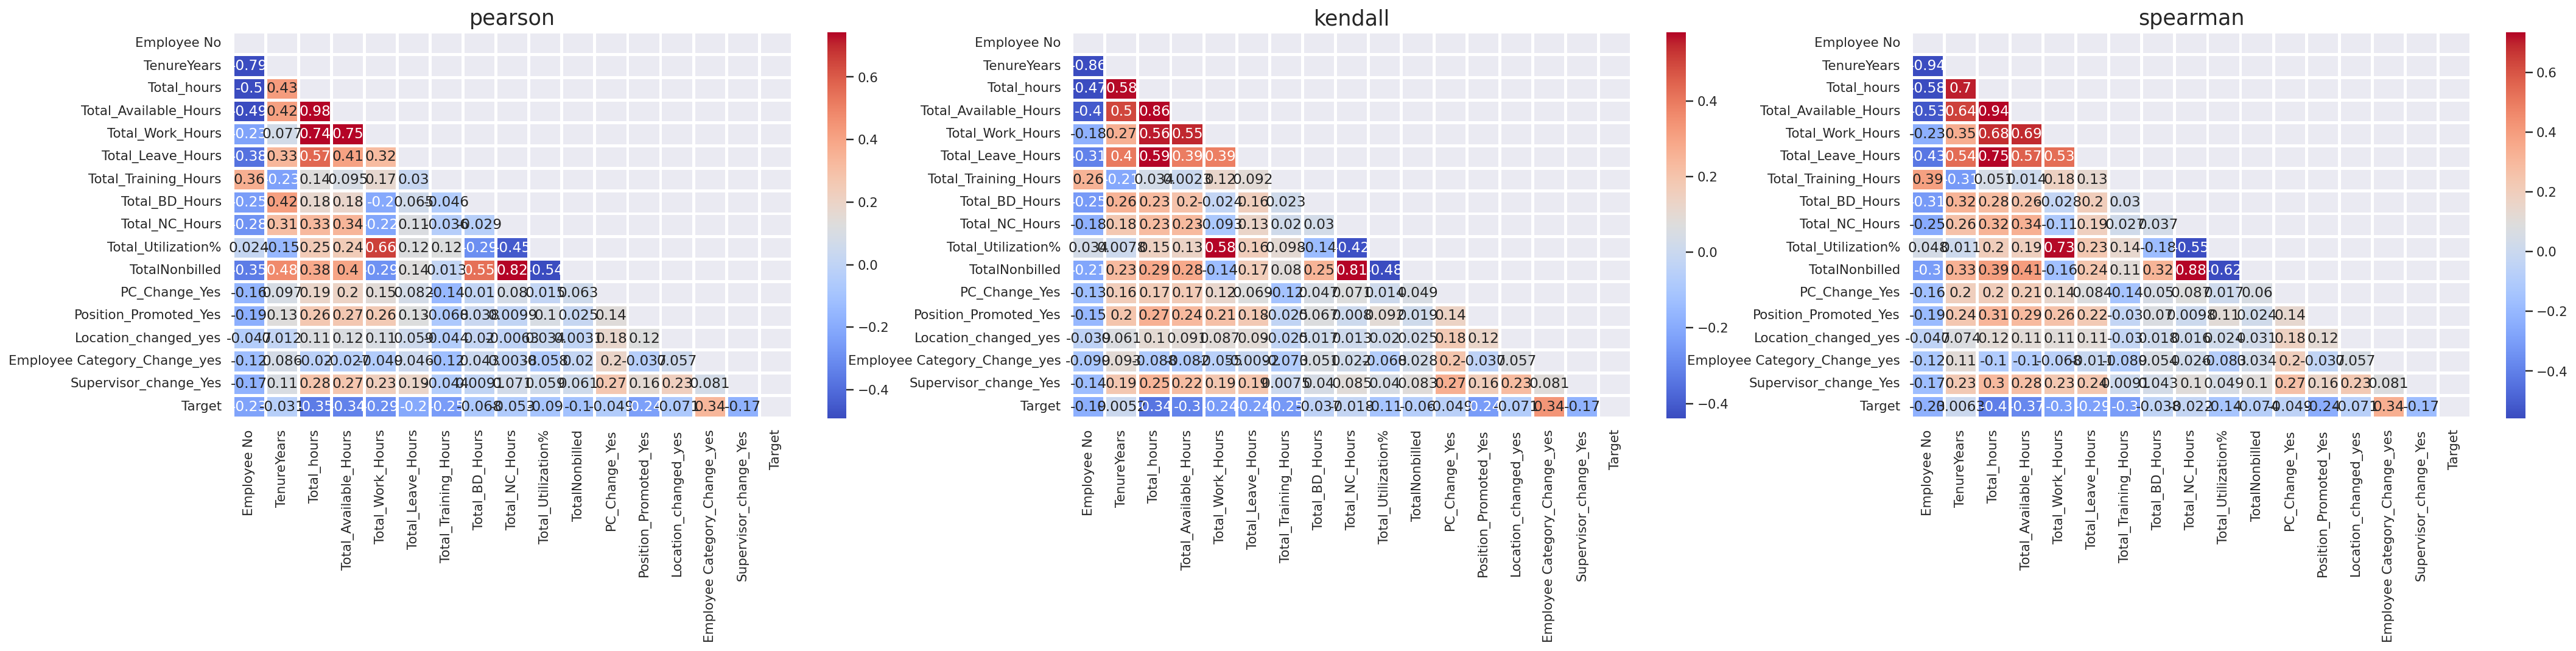

In [260]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, annot=True, cmap="coolwarm", mask= np.triu(data.corr()), robust=True)
  plt.title(i, fontsize=18)



## 4.7 Necessary corrections with EDA Insights

### 4.71. Convert Negative values of TAH, BD, NC hours to zero.


In [261]:
data['Total_Available_Hours'].mask(data['Total_Available_Hours'] <0, 0, inplace=True)
data['Total_BD_Hours'].mask(data['Total_BD_Hours'] <0, 0, inplace=True)
data['Total_NC_Hours'].mask(data['Total_NC_Hours'] <0, 0, inplace=True)

### 4.72. Quantile-based Flooring and Capping outliers on Outliers

1. *Total_Leave_Hours*

In [262]:
print(data['Total_Leave_Hours'].quantile(0.10))
print(data['Total_Leave_Hours'].quantile(0.90))


16.0
272.0


In [263]:
data["Total_Leave_Hours"] = np.where(data["Total_Leave_Hours"] <16.0, 16.0,data['Total_Leave_Hours'])
data["Total_Leave_Hours"] = np.where(data["Total_Leave_Hours"] >272.0, 272.0,data['Total_Leave_Hours'])

2. *Total_BD_Hours*

In [264]:
print(data['Total_BD_Hours'].quantile(0.10))
print(data['Total_BD_Hours'].quantile(0.90))


0.0
72.0


In [265]:
data["Total_BD_Hours"] = np.where(data["Total_BD_Hours"] <0.0, 0.0,data['Total_BD_Hours'])
data["Total_BD_Hours"] = np.where(data["Total_BD_Hours"] >72.0, 72.0,data['Total_BD_Hours'])

3. *Total_NC_Hours*

In [266]:
print(data['Total_NC_Hours'].quantile(0.10))
print(data['Total_NC_Hours'].quantile(0.90))


24.0
760.5


In [267]:
data["Total_NC_Hours"] = np.where(data["Total_NC_Hours"] <24.0, 24.0,data['Total_NC_Hours'])
data["Total_NC_Hours"] = np.where(data["Total_NC_Hours"] >760.5, 760.5,data['Total_NC_Hours'])

4. *Total_Utilization%*

In [268]:
print(data['Total_Utilization%'].quantile(0.10))
print(data['Total_Utilization%'].quantile(0.90))


0.1754808218360506
0.9980571258237256


In [269]:
data["Total_Utilization%"] = np.where(data["Total_Utilization%"] <0.17548, 0.17548,data['Total_Utilization%'])
data["Total_Utilization%"] = np.where(data["Total_Utilization%"] >0.9980, 0.9980,data['Total_Utilization%'])

5. *TotalNonbilled*

In [270]:
print(data['TotalNonbilled'].quantile(0.10))
print(data['TotalNonbilled'].quantile(0.90))


62.0
980.0


In [271]:
data["TotalNonbilled"] = np.where(data["TotalNonbilled"] <62.0, 62.0,data['TotalNonbilled'])
data["TotalNonbilled"] = np.where(data["TotalNonbilled"] >980.0, 980.0,data['TotalNonbilled'])

6. *TenureYears*

In [272]:
print(data['TenureYears'].quantile(0.10))
print(data['TenureYears'].quantile(0.90))


0.3333333333333333
5.75


In [273]:
data["TenureYears"] = np.where(data["TenureYears"] <0.3333, 0.3333,data['TenureYears'])
data["TenureYears"] = np.where(data["TenureYears"] >5.75, 5.75,data['TenureYears'])

# 5.0 Building prediction models

## 5.0 Segregating train and test

 we want to split the data in 70:15:15 for train:valid:test dataset

In [274]:
#Drop target variable from X and copy to y
X=data.drop(['Target'],axis=1)
y=data['Target']
X.shape, y.shape

((1111, 24), (1111,))

In [275]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7, random_state = 42, stratify=y)


In [276]:
# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 42, stratify=y_rem)


In [277]:

# Print the sets data shapes
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))




X_train shape: (777, 24)
y_train shape: (777,)
X_valid shape: (167, 24)
y_valid shape: (167,)
X_test shape: (167, 24)
y_test shape: (167,)


In [278]:
X_train_Split = X_train.copy() #copying
X_valid_Split = X_valid.copy()
X_test_Split = X_test.copy()



 ## 5.1 Attribute Relevance Analysis

In [279]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [280]:
final_iv, IV = data_vars(X_train, y_train)

In [281]:
final_iv

VAR_NAME       MIN_VALUE       MAX_VALUE  COUNT  EVENT  EVENT_RATE  \
0       Employee No             1.0           545.0    389    131    0.336761   
1       Employee No           546.0          1111.0    388     63    0.162371   
2     Employee Name    Aaron Mcneil    Aaron Mcneil      1      0    0.000000   
3     Employee Name  Abigail Amabel  Abigail Amabel      1      0    0.000000   
4     Employee Name     Adda Rachel     Adda Rachel      1      0    0.000000   
...             ...             ...             ...    ...    ...         ...   
1001  CurrentStatus          Active          Active    557      0    0.000000   
1002  CurrentStatus      New Joiner      New Joiner     19      0    0.000000   
1003  CurrentStatus        Resigned        Resigned    194    194    1.000000   
1004  CurrentStatus      Sabbatical      Sabbatical      2      0    0.000000   
1005  CurrentStatus      Secondment      Secondment      5      0    0.000000   

      NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT       WOE        IV  
0          258        0.663239    0.675258        0.442539  0.422567  0.224092  
1          325        0.837629    0.324742        0.557461 -0.540361  0.224092  
2            1        1.000000    0.000000        0.001715  0.000000  0.015138  
3            1        1.000000    0.000000        0.001715  0.000000  0.015138  
4            1        1.000000    0.000000        0.001715  0.000000  0.015138  
...        ...             ...         ...             ...       ...       ...  
1001       557        1.000000    0.000000        0.955403  0.000000  0.000000  
1002        19        1.000000    0.000000        0.032590  0.000000  0.000000  
1003         0        0.000000    1.000000        0.000000  0.000000  0.000000  
1004         2        1.000000    0.000000        0.003431  0.000000  0.000000  
1005         5        1.000000    0.000000        0.008576  0.000000  0.000000  

[1006 rows x 12 columns]

In [282]:
IV_sort = IV.sort_values('IV', ascending = False) # sorting variables based on IV scores to know highly relevant features for logistic regression
IV_sort

VAR_NAME        IV
4                  Last_Category  1.252828
16         Total_Available_Hours  1.092567
23                   Total_hours  0.986765
18             Total_Leave_Hours  0.536651
9                Last_Supervisor  0.512016
1   Employee Category_Change_yes  0.503861
22              Total_Work_Hours  0.482151
3                    Employee No  0.224092
20          Total_Training_Hours  0.164877
13         Supervisor_change_Yes  0.160396
5         Last_Employee_Position  0.097155
6                  Last_Location  0.089612
21            Total_Utilization%  0.062064
12         Position_Promoted_Yes  0.051741
8             Last_Profit_Center  0.040788
10          Location_changed_yes  0.031731
15                TotalNonbilled  0.028463
11                 PC_Change_Yes  0.021513
14                   TenureYears  0.018461
2                  Employee Name  0.015138
17                Total_BD_Hours  0.010461
19                Total_NC_Hours  0.001302
7              Last_People_Group  0.000074
0                  CurrentStatus  0.000000

If the IV statistic is:

* Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
* 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
* 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
* 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
* greater than 0.5, suspicious relationship (Check once)

Variables with less than 0.02 IV score should be dropped.

In [283]:
IV_sortNew = IV_sort[IV_sort['IV'] > 0.02]

In [284]:
AAA_featlist= list(IV_sortNew.VAR_NAME)
AAA_featlist.remove('Employee No')
AAA_featlist

['Last_Category',
 'Total_Available_Hours',
 'Total_hours',
 'Total_Leave_Hours',
 'Last_Supervisor',
 'Employee Category_Change_yes',
 'Total_Work_Hours',
 'Total_Training_Hours',
 'Supervisor_change_Yes',
 'Last_Employee_Position',
 'Last_Location',
 'Total_Utilization%',
 'Position_Promoted_Yes',
 'Last_Profit_Center',
 'Location_changed_yes',
 'TotalNonbilled',
 'PC_Change_Yes']

In [285]:
# X_train = X_train[X_train.columns.intersection(AAA_featlist)]
# X_valid = X_valid[X_valid.columns.intersection(AAA_featlist)]
# X_test = X_test[X_test.columns.intersection(AAA_featlist)]

# X_train.columns

----

In [286]:
X_train = X_train_Split 
X_valid = X_valid_Split
X_test = X_test_Split


## 5.2 : Pre-processing

### 5.21 : Feature transformation

1. Right Skewed

In [287]:
X_train['Total_Training_Hours'] = np.sqrt(X_train['Total_Training_Hours'])
X_train['Total_NC_Hours'] = np.sqrt(X_train['Total_NC_Hours'])
X_train['TotalNonbilled'] = np.sqrt(X_train['TotalNonbilled'])



In [288]:
X_valid['Total_Training_Hours'] = np.sqrt(X_valid['Total_Training_Hours'])
X_valid['Total_NC_Hours'] = np.sqrt(X_valid['Total_NC_Hours'])
X_valid['TotalNonbilled'] = np.sqrt(X_valid['TotalNonbilled'])



In [289]:
X_test['Total_Training_Hours'] = np.sqrt(X_test['Total_Training_Hours'])
X_test['Total_NC_Hours'] = np.sqrt(X_test['Total_NC_Hours'])
X_test['TotalNonbilled'] = np.sqrt(X_test['TotalNonbilled'])



2. Left Skewed

In [290]:
X_train['Total_hours'] = np.square(X_train['Total_hours'])
X_train['Total_Available_Hours'] = np.square(X_train['Total_Available_Hours'])
X_train['Total_Utilization%'] = np.square(X_train['Total_Utilization%'])



In [291]:
X_valid['Total_hours'] = np.square(X_valid['Total_hours'])
X_valid['Total_Available_Hours'] = np.square(X_valid['Total_Available_Hours'])
X_valid['Total_Utilization%'] = np.square(X_valid['Total_Utilization%'])



In [292]:
X_test['Total_hours'] = np.square(X_test['Total_hours'])
X_test['Total_Available_Hours'] = np.square(X_test['Total_Available_Hours'])
X_test['Total_Utilization%'] = np.square(X_test['Total_Utilization%'])



### 5.22 :  Feature engineering : Applying WOE values to Last_Supervisor column

This is done to get information from Last_Supervisor column and Drop this Sparse Column which contains 152 variables.

In [293]:
data.Last_Supervisor.nunique()

152

In [294]:
transform_vars_list = ['Last_Supervisor']
transform_prefix = 'WOE_'

In [295]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            X_train[transform_prefix + var] = X_train[var].apply(lambda x: eval(replace_cmd))
        except:
            X_train[transform_prefix + var] = X_train[var].apply(lambda x: eval(replace_cmd1))

In [296]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            X_valid[transform_prefix + var] = X_valid[var].apply(lambda x: eval(replace_cmd))
        except:
            X_valid[transform_prefix + var] = X_valid[var].apply(lambda x: eval(replace_cmd1))

In [297]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            X_test[transform_prefix + var] = X_test[var].apply(lambda x: eval(replace_cmd))
        except:
            X_test[transform_prefix + var] = X_test[var].apply(lambda x: eval(replace_cmd1))

####5.221: Binning Last_Supervisor based on WOE scores

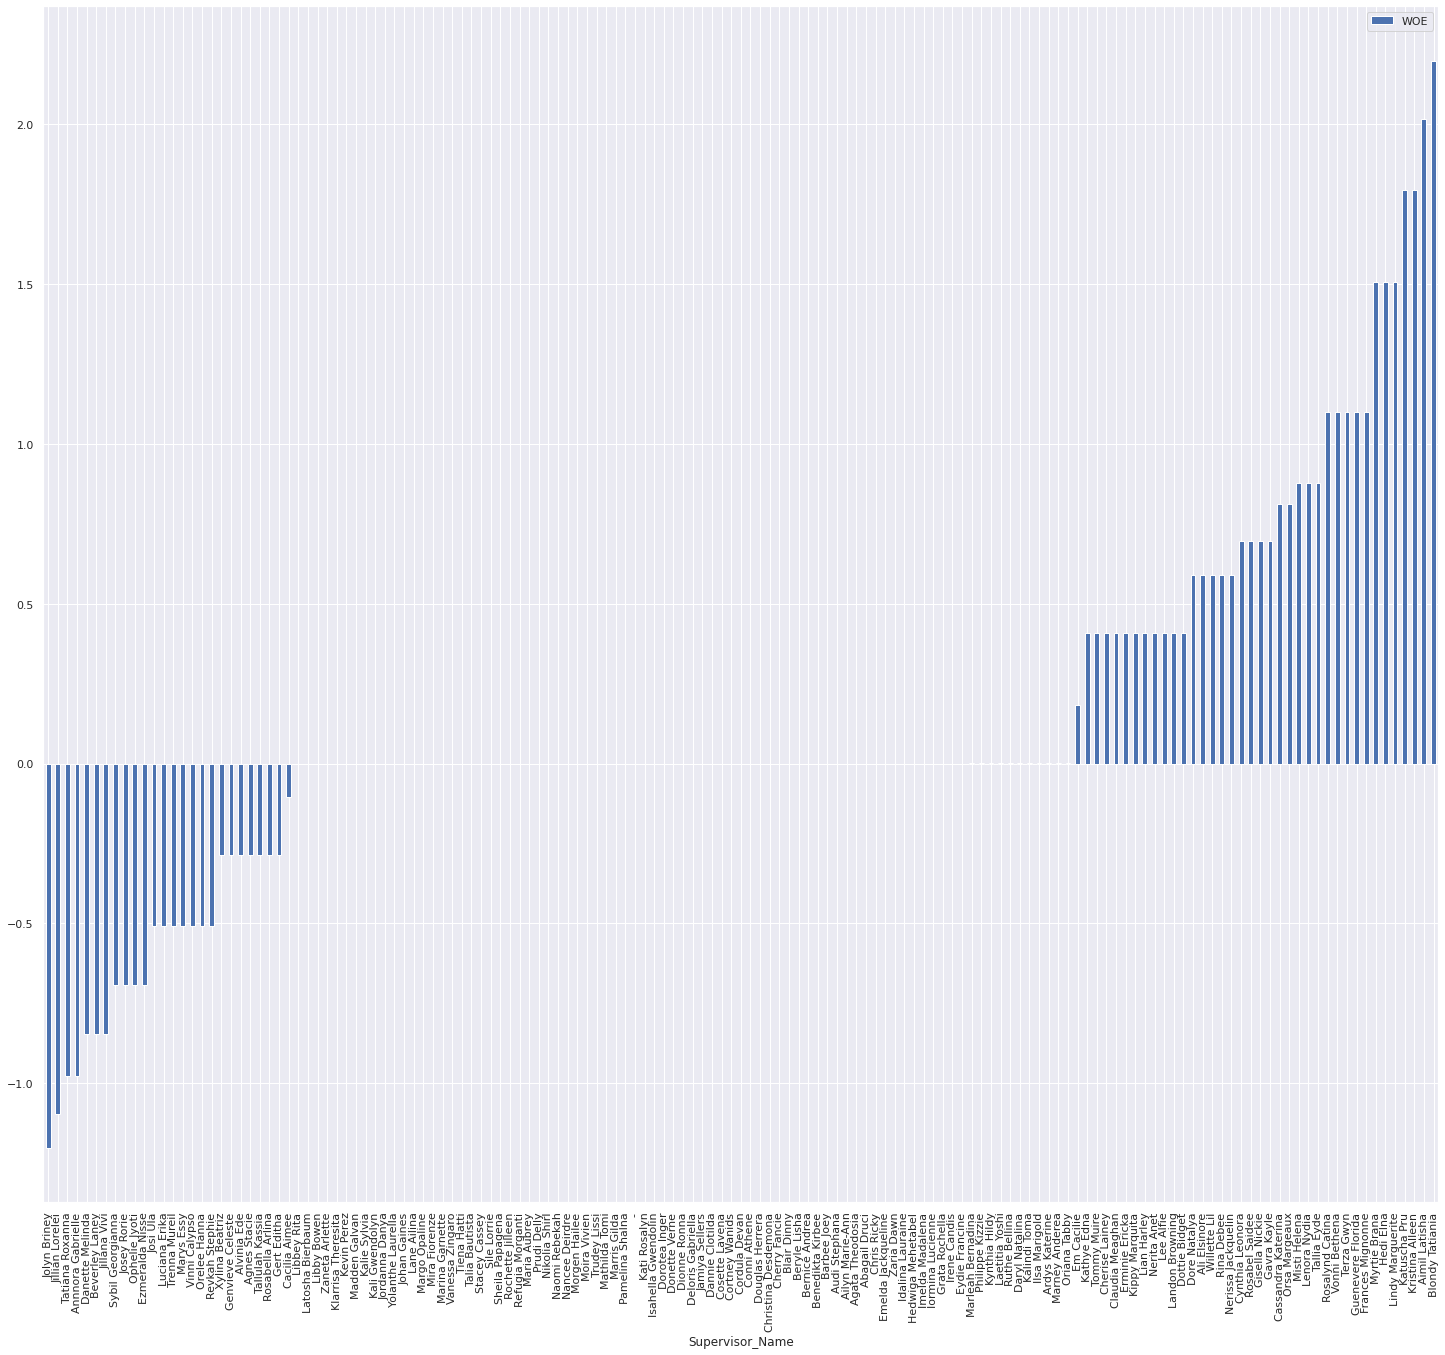

In [298]:
Supervisor_df = final_iv[final_iv['VAR_NAME'] == 'Last_Supervisor']
Supervisor_df.rename(columns = {'MIN_VALUE':'Supervisor_Name'}, inplace = True)
Supervisor_df= Supervisor_df.drop(['MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE',
       'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT', 'DIST_NON_EVENT'], axis = 1)
Supervisor_df.reset_index(drop=True, inplace=True)
Supervisor_df_sorted= Supervisor_df.sort_values('WOE', ascending=True)


import matplotlib.pyplot as mp

# plotting the dataframe
Supervisor_df_sorted.plot(x="Supervisor_Name", y="WOE", kind="bar", figsize=(25, 22))

# displaying bar graph
mp.show()

In [299]:
labels=['verylow','low','neutral','high','danger']
bins=[-1.5, -0.5, -0.10, 0.12, 0.5, 2.5]

X_train['Supervisor_grade'] = pd.cut(X_train['WOE_Last_Supervisor'], bins=bins, labels=labels)
X_valid['Supervisor_grade'] = pd.cut(X_valid['WOE_Last_Supervisor'], bins=bins, labels=labels)
X_test['Supervisor_grade'] = pd.cut(X_test['WOE_Last_Supervisor'], bins=bins, labels=labels)


In [300]:
X_train_Cluster = X_train.copy() #copying
X_valid_Cluster = X_valid.copy()
X_test_Cluster = X_test.copy()



### 5.23 : Feature Scaling (Using MinMax Scaler)


In [301]:
### Seperating categorical and numerical features

num_feat = ['TenureYears', 'Total_hours',
       'Total_Available_Hours', 'Total_Work_Hours', 'Total_Leave_Hours',
       'Total_Training_Hours', 'Total_BD_Hours', 'Total_NC_Hours',
       'Total_Utilization%', 'TotalNonbilled', 'WOE_Last_Supervisor']

Cat_feat = ['Last_Profit_Center',
       'Last_Employee_Position', 'Last_Location', 'Last_Category',
       'Last_Supervisor', 'Last_People_Group','Supervisor_grade']

In [302]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [303]:
for col in num_feat:
    X_train[col]= scaler.fit_transform(X_train[col].values.reshape(-1,1))
    X_valid[col]= scaler.transform(X_valid[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1))

### 5.24 Feature Encoding


#### 5.241. Label Encoding using Map Function

In [304]:
Pos_category = {'Level 1':12,'Level 2':11,'Level 3':10,'Level 4':9,'Level 5':8,'Level 6':7,
                     'Level 7':6,'Level 8':5,'Level 10':4,
                     '-':3,'Level A1':2,'Level A2':1,'Level A3':0}

grade_category = {'verylow':0,'low':1,'neutral':2,'high':3,'danger':4}

X_train["Last_Employee_Position"] = X_train["Last_Employee_Position"].map(Pos_category)
X_valid["Last_Employee_Position"] = X_valid["Last_Employee_Position"].map(Pos_category)
X_test["Last_Employee_Position"] = X_test["Last_Employee_Position"].map(Pos_category)

X_train["Supervisor_grade"] = X_train["Supervisor_grade"].map(grade_category)
X_valid["Supervisor_grade"] = X_valid["Supervisor_grade"].map(grade_category)
X_test["Supervisor_grade"] = X_test["Supervisor_grade"].map(grade_category)


#### 5.242. OneHot Encoding using pd.get_dummies function


In [305]:
X_train["Last_Profit_Center"] = X_train["Last_Profit_Center"].astype(CategoricalDtype(['PC - 1', 'PC - 2', 'PC - 3', 'PC - 4', 'PC - 6', 'PC - 5','PC - 7', 'PC - 8', 'PC - 9', 'PC - 11', 'PC - 10']))
X_valid["Last_Profit_Center"] = X_valid["Last_Profit_Center"].astype(CategoricalDtype(['PC - 1', 'PC - 2', 'PC - 3', 'PC - 4', 'PC - 6', 'PC - 5','PC - 7', 'PC - 8', 'PC - 9', 'PC - 11', 'PC - 10']))
X_test["Last_Profit_Center"] = X_test["Last_Profit_Center"].astype(CategoricalDtype(['PC - 1', 'PC - 2', 'PC - 3', 'PC - 4', 'PC - 6', 'PC - 5','PC - 7', 'PC - 8', 'PC - 9', 'PC - 11', 'PC - 10']))


X_train["Last_Location"] = X_train["Last_Location"].astype(CategoricalDtype(['Location 3', 'Location 7', 'Location 1', 'Location 9', 'Location 2', 'Location 8', 'Location 4', 'Location 6','Location 5']))
X_valid["Last_Location"] = X_valid["Last_Location"].astype(CategoricalDtype(['Location 3', 'Location 7', 'Location 1', 'Location 9', 'Location 2', 'Location 8', 'Location 4', 'Location 6','Location 5']))
X_test["Last_Location"] = X_test["Last_Location"].astype(CategoricalDtype(['Location 3', 'Location 7', 'Location 1', 'Location 9', 'Location 2', 'Location 8', 'Location 4', 'Location 6','Location 5']))


X_train["Last_Category"] = X_train["Last_Category"].astype(CategoricalDtype(['SVP/VP', 'Resigned', 'Level 1/2', 'Confirmed Staff',
       'Serving Notice Period', 'Confirmed Staff (Part-Time 4 Hours)',
       'Secondee-Outward-Without Pay', 'Awaiting Termination',
       'Confirmed Staff (Part-Time 6 Hours)', 'Confirmed-Sabbatical',
       'Staff on Probation', 'Fixed term Staff']))

X_valid["Last_Category"] = X_valid["Last_Category"].astype(CategoricalDtype(['SVP/VP', 'Resigned', 'Level 1/2', 'Confirmed Staff',
       'Serving Notice Period', 'Confirmed Staff (Part-Time 4 Hours)',
       'Secondee-Outward-Without Pay', 'Awaiting Termination',
       'Confirmed Staff (Part-Time 6 Hours)', 'Confirmed-Sabbatical',
       'Staff on Probation', 'Fixed term Staff']))

X_test["Last_Category"] = X_test["Last_Category"].astype(CategoricalDtype(['SVP/VP', 'Resigned', 'Level 1/2', 'Confirmed Staff',
       'Serving Notice Period', 'Confirmed Staff (Part-Time 4 Hours)',
       'Secondee-Outward-Without Pay', 'Awaiting Termination',
       'Confirmed Staff (Part-Time 6 Hours)', 'Confirmed-Sabbatical',
       'Staff on Probation', 'Fixed term Staff']))



X_train = pd.concat([X_train,pd.get_dummies(X_train['Last_Profit_Center'], prefix='ProfCenter', drop_first=True)],axis=1).drop(['Last_Profit_Center'],axis=1)
X_valid = pd.concat([X_valid,pd.get_dummies(X_valid['Last_Profit_Center'], prefix='ProfCenter', drop_first=True)],axis=1).drop(['Last_Profit_Center'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Last_Profit_Center'], prefix='ProfCenter', drop_first=True)],axis=1).drop(['Last_Profit_Center'],axis=1)


X_train = pd.concat([X_train,pd.get_dummies(X_train['Last_Location'], prefix='Location', drop_first=True)],axis=1).drop(['Last_Location'],axis=1)
X_valid = pd.concat([X_valid,pd.get_dummies(X_valid['Last_Location'], prefix='Location', drop_first=True)],axis=1).drop(['Last_Location'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Last_Location'], prefix='Location', drop_first=True)],axis=1).drop(['Last_Location'],axis=1)


X_train = pd.concat([X_train,pd.get_dummies(X_train['Last_Category'], prefix='category', drop_first=True)],axis=1).drop(['Last_Category'],axis=1)
X_valid = pd.concat([X_valid,pd.get_dummies(X_valid['Last_Category'], prefix='category', drop_first=True)],axis=1).drop(['Last_Category'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Last_Category'], prefix='category', drop_first=True)],axis=1).drop(['Last_Category'],axis=1)



## 5.3 Cluster Analysis

k-Means Clustering based on 2 features:  

* Total_Training_Hours
* Total_Utilization%
 , to find high performance Employees

In [306]:
from sklearn.cluster import KMeans #Importing Library

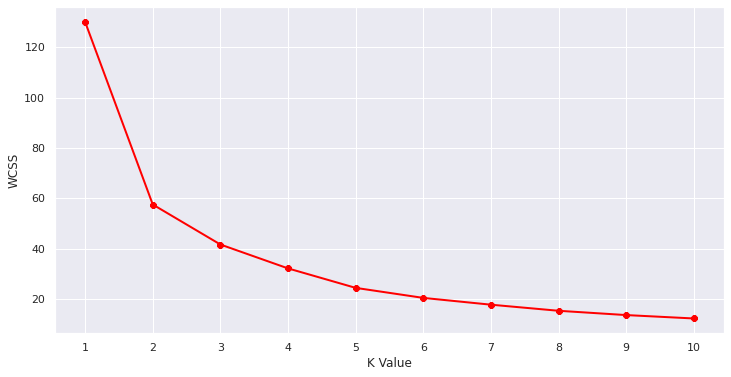

In [307]:
#Taking the features

data_clusterNew= X_train[['Total_Training_Hours', 'Total_Utilization%']]

#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data_clusterNew)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [308]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=4, random_state =42)
y2 = km2.fit_predict(data_clusterNew)
data_clusterNew["label"] = y2
X_train["label"] = y2

#The data with labels
data_clusterNew.head()

Total_Training_Hours  Total_Utilization%  label
841               0.813267            0.830287      0
917               0.604080            0.457058      3
1006              0.727890            1.000000      0
1069              0.580381            0.000000      1
878               0.763188            1.000000      0

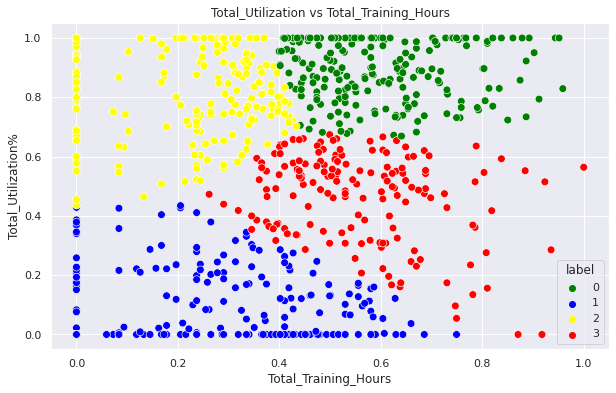

In [309]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Total_Training_Hours',y = 'Total_Utilization%',hue="label",  
                 palette=['green','blue','yellow','red'], legend='full',data = data_clusterNew  ,s = 60 )
plt.xlabel("Total_Training_Hours")
plt.ylabel("Total_Utilization%")
plt.title('Total_Utilization vs Total_Training_Hours')

plt.show()


 **Counting employees in each cluster**


In [310]:
import plotly.express as px
pie= data_clusterNew.groupby("label").count().reset_index().rename(columns={"Total_Training_Hours":"count"}).drop(columns={'Total_Utilization%'} )
px.pie(pie,values='count',names='label')


* Label 0 ='GREEN' { 27 % }
* Label 1 ='BLUE   { 26.1 % }
* Label 2 ='YELLOW { 25.5 % }
* Label 3 ='RED'   { 21.4 % }

### 5.31 segmentation based on Employee Name

In [311]:
emp0=X_train[X_train["label"]==0]
print('Number of employees in 0th cluster=', len(emp0))
print('They are -', emp0["Employee Name"].values)
print("--------------------------------------------")

emp1=X_train[X_train["label"]==1]
print('Number of employees in 1st cluster=', len(emp1))
print('They are -', emp1["Employee Name"].values)
print("--------------------------------------------")

emp2=X_train[X_train["label"]==2]
print('Number of employees in 2nd cluster=', len(emp2))
print('They are -', emp2["Employee Name"].values)
print("--------------------------------------------")

emp3=X_train[X_train["label"]==3]
print('Number of employees in 3rd cluster=', len(emp3))
print('They are -', emp3["Employee Name"].values)
print("--------------------------------------------")


Number of employees in 0th cluster= 210
They are - ['Avery Griffin' 'Rylee Compton' 'Carlo Mcneil' 'Amara Webb' 'Edna Caso'
 'Darion Haas' 'Tove Corabella' 'Velvet Mariana' 'Remington Lara' 'Ag Koo'
 'Ranice Gilberte' 'Kamryn Miranda' 'Ali Lowery' 'Zsa Zsa Flo'
 'Sayre Nadya' 'Kacey Lida' 'Alvera Gerianna' 'Terrie Rosemaria'
 'Donna Kyser' 'Sal Tiffanie' 'Cassidy Barnett' 'Buffy Glynda'
 'Malia Mason' 'Cecil Luci' 'Elyn Kala' 'Rayna Armstrong' 'Elva Annmarie'
 'Gloria Robbyn' 'Anne-Corinne Rennie' 'Anastasie Lindsay' 'Helen Elsy'
 'Precious Davila' 'Sophey Odelia' 'Fernande Lettie' 'Annis Maritsa'
 'Gwennie Brandise' 'Bliss Darcy' 'Katinka Roxy' 'Mercedes Murillo'
 'Tanya Ilysa' 'Angelique Darb' 'Diana Ardelis' 'Orelie Domeniga'
 'Hendrika Nettle' 'Biddie Alidia' 'Clem Joy' 'Raye Emmye' 'Charla Anthea'
 'Fanchon Vitia' 'Tish Regan' 'Ofella Jenica' 'Tomasina Rozina'
 'Aimee Reynolds' 'Nylah Olsen' 'Savanah Beltran' 'Darla Dre'
 'Kayleigh Moody' 'Maurita La Verne' 'Ryleigh Ortiz' 'Baron 

### 5.32 segmentation based on Employee No

In [312]:
emp0=X_train[X_train["label"]==0]
print('Number of employees in 0th cluster=', len(emp0))
print('They are -', emp0["Employee No"].values)
print("--------------------------------------------")

emp1=X_train[X_train["label"]==1]
print('Number of employees in 1st cluster=', len(emp1))
print('They are -', emp1["Employee No"].values)
print("--------------------------------------------")

emp2=X_train[X_train["label"]==2]
print('Number of employees in 2nd cluster=', len(emp2))
print('They are -', emp2["Employee No"].values)
print("--------------------------------------------")

emp3=X_train[X_train["label"]==3]
print('Number of employees in 3rd cluster=', len(emp3))
print('They are -', emp3["Employee No"].values)
print("--------------------------------------------")


Number of employees in 0th cluster= 210
They are - [ 842. 1007.  879.  940.  809.  967.  505.  239.  900.  698.  580.  848.
  884.  633.  657.  762.  662.  572.  835.  256.  853.  556.  938.  774.
  499.  919.  535.  181.  696.  601.  321.  888.  524.  691.  264.  542.
  614.  566.  932.  670.  457.  280.  602.  635.  265.  339.  250.  651.
  234.  552.  465.  340.  936.  988. 1019.  711. 1043.  510.  896. 1084.
  668.  660.  801.  901.  392.  820.  914.  643.  834.   99.   95.  632.
  382.  743.  362.  314.  350.  851.  699.  803.  558.  992.  626.  131.
  647.  183. 1069.  380.   86.  708.  540.  843.  897.  877.  935.  921.
  824.  623.  974.  349.  522.  669.  806.  616.  810.  673.  557.  808.
 1060.  906.  456.  734.  997.  782.  833.  861.  976.  292.  302.  702.
  841.  666.  889.  177.  287.  584.  232.  112.  969.  937.  565.  220.
  667.  460.  191.  986.  852.  714.  679.  513.  263.  885.  549. 1092.
   91.  237.  942.  845.  559.  150.  881.  313.  591.  693.  913.  413.


* Label 0 ='GREEN' { 27 % } is the high performance cluster

## 5.4 : Dimensionality reduction


### 5.41 :EDA Insights based Basic filtering

In order to reduce dimensionality , we are dropping certain variables which are found to be not useful for modeling during EDA on following reasons.



*   Employee Name : Not providing any useful information for model, only a label identifier.

*   Last_People_Group : EDA shows us that 99% of values are Client Service Staff. variance is very low.

*   CurrentStatus : Target column is created from CurrentStatus. so dropping to avoid High multicollinearity 


In [313]:
# Drop unwanted columns
X_train.drop(['Employee Name', 'Last_Supervisor', 'Last_People_Group','CurrentStatus', 'label'], axis=1,inplace=True)  
X_valid.drop(['Employee Name', 'Last_Supervisor', 'Last_People_Group','CurrentStatus'], axis=1,inplace=True)  
X_test.drop(['Employee Name', 'Last_Supervisor', 'Last_People_Group','CurrentStatus'], axis=1,inplace=True)  

### 5.42 : Low_variance_filter

In [314]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.00)  #Removing both constant and quasi-constant
var_thr.fit(X_train)

var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [315]:
concol = [column for column in X_train.columns 
          if column not in X_train.columns[var_thr.get_support()]]

for features in concol:
    print(features)

ProfCenter_PC - 8
ProfCenter_PC - 9
ProfCenter_PC - 11
category_Confirmed Staff (Part-Time 6 Hours)


The following variables have very low variance through out the dataset. so we are dropping these variables as they dont give much information.

*   ProfCenter_PC - 8
*   ProfCenter_PC - 9
*   ProfCenter_PC - 11
*   category_Confirmed Staff (Part-Time 6 Hours)




In [316]:
# Drop unwanted columns

X_train.drop(concol,axis=1, inplace=True)
X_valid.drop(concol,axis=1, inplace=True)
X_test.drop(concol,axis=1, inplace=True)


### 5.43 : High_Correlation_Filter

In [317]:
# isolating numerical datatypes
numerical = X_train.select_dtypes(include=['int64','float64'])[:]
numerical.dtypes

Employee No                     float64
Last_Employee_Position            int64
TenureYears                     float64
Total_hours                     float64
Total_Available_Hours           float64
Total_Work_Hours                float64
Total_Leave_Hours               float64
Total_Training_Hours            float64
Total_BD_Hours                  float64
Total_NC_Hours                  float64
Total_Utilization%              float64
TotalNonbilled                  float64
PC_Change_Yes                   float64
Position_Promoted_Yes           float64
Location_changed_yes            float64
Employee Category_Change_yes    float64
Supervisor_change_Yes           float64
WOE_Last_Supervisor             float64
dtype: object

In [318]:
# calculating correlation
correlation = numerical.corr()
correlation

Employee No  Last_Employee_Position  \
Employee No                      1.000000               -0.507790   
Last_Employee_Position          -0.507790                1.000000   
TenureYears                     -0.895678                0.594562   
Total_hours                     -0.556165                0.367590   
Total_Available_Hours           -0.541212                0.371947   
Total_Work_Hours                -0.257703                0.004847   
Total_Leave_Hours               -0.443254                0.228183   
Total_Training_Hours             0.392209               -0.113656   
Total_BD_Hours                  -0.345153                0.502735   
Total_NC_Hours                  -0.255261                0.229638   
Total_Utilization%               0.034244               -0.252259   
TotalNonbilled                  -0.336891                0.422916   
PC_Change_Yes                   -0.172381                0.074043   
Position_Promoted_Yes           -0.198258                0.276796   
Location_changed_yes            -0.069622                0.085461   
Employee Category_Change_yes    -0.084482                0.022146   
Supervisor_change_Yes           -0.175622                0.080326   
WOE_Last_Supervisor             -0.081170               -0.040340   

                              TenureYears  Total_hours  Total_Available_Hours  \
Employee No                     -0.895678    -0.556165              -0.541212   
Last_Employee_Position           0.594562     0.367590               0.371947   
TenureYears                      1.000000     0.577148               0.553344   
Total_hours                      0.577148     1.000000               0.969465   
Total_Available_Hours            0.553344     0.969465               1.000000   
Total_Work_Hours                 0.224122     0.728393               0.726131   
Total_Leave_Hours                0.466970     0.778154               0.651380   
Total_Training_Hours            -0.294517     0.112256               0.057105   
Total_BD_Hours                   0.385981     0.261529               0.249769   
Total_NC_Hours                   0.249371     0.321343               0.323875   
Total_Utilization%              -0.081661     0.245924               0.233231   
TotalNonbilled                   0.362510     0.399398               0.402315   
PC_Change_Yes                    0.162744     0.200346               0.221917   
Position_Promoted_Yes            0.203705     0.286570               0.291098   
Location_changed_yes             0.055763     0.126716               0.128723   
Employee Category_Change_yes     0.025624    -0.120870              -0.123861   
Supervisor_change_Yes            0.166078     0.275537               0.259117   
WOE_Last_Supervisor             -0.001271    -0.132258              -0.126116   

                              Total_Work_Hours  Total_Leave_Hours  \
Employee No                          -0.257703          -0.443254   
Last_Employee_Position                0.004847           0.228183   
TenureYears                           0.224122           0.466970   
Total_hours                           0.728393           0.778154   
Total_Available_Hours                 0.726131           0.651380   
Total_Work_Hours                      1.000000           0.585909   
Total_Leave_Hours                     0.585909           1.000000   
Total_Training_Hours                  0.188559           0.162970   
Total_BD_Hours                       -0.086188           0.191445   
Total_NC_Hours                       -0.109835           0.204393   
Total_Utilization%                    0.748164           0.273592   
TotalNonbilled                       -0.174241           0.249184   
PC_Change_Yes                         0.162446           0.092197   
Position_Promoted_Yes                 0.257869           0.225966   
Location_changed_yes                  0.119805           0.116733   
Employee Category_Change_yes         -0.054801          -0.036004   
Super

Heatmap

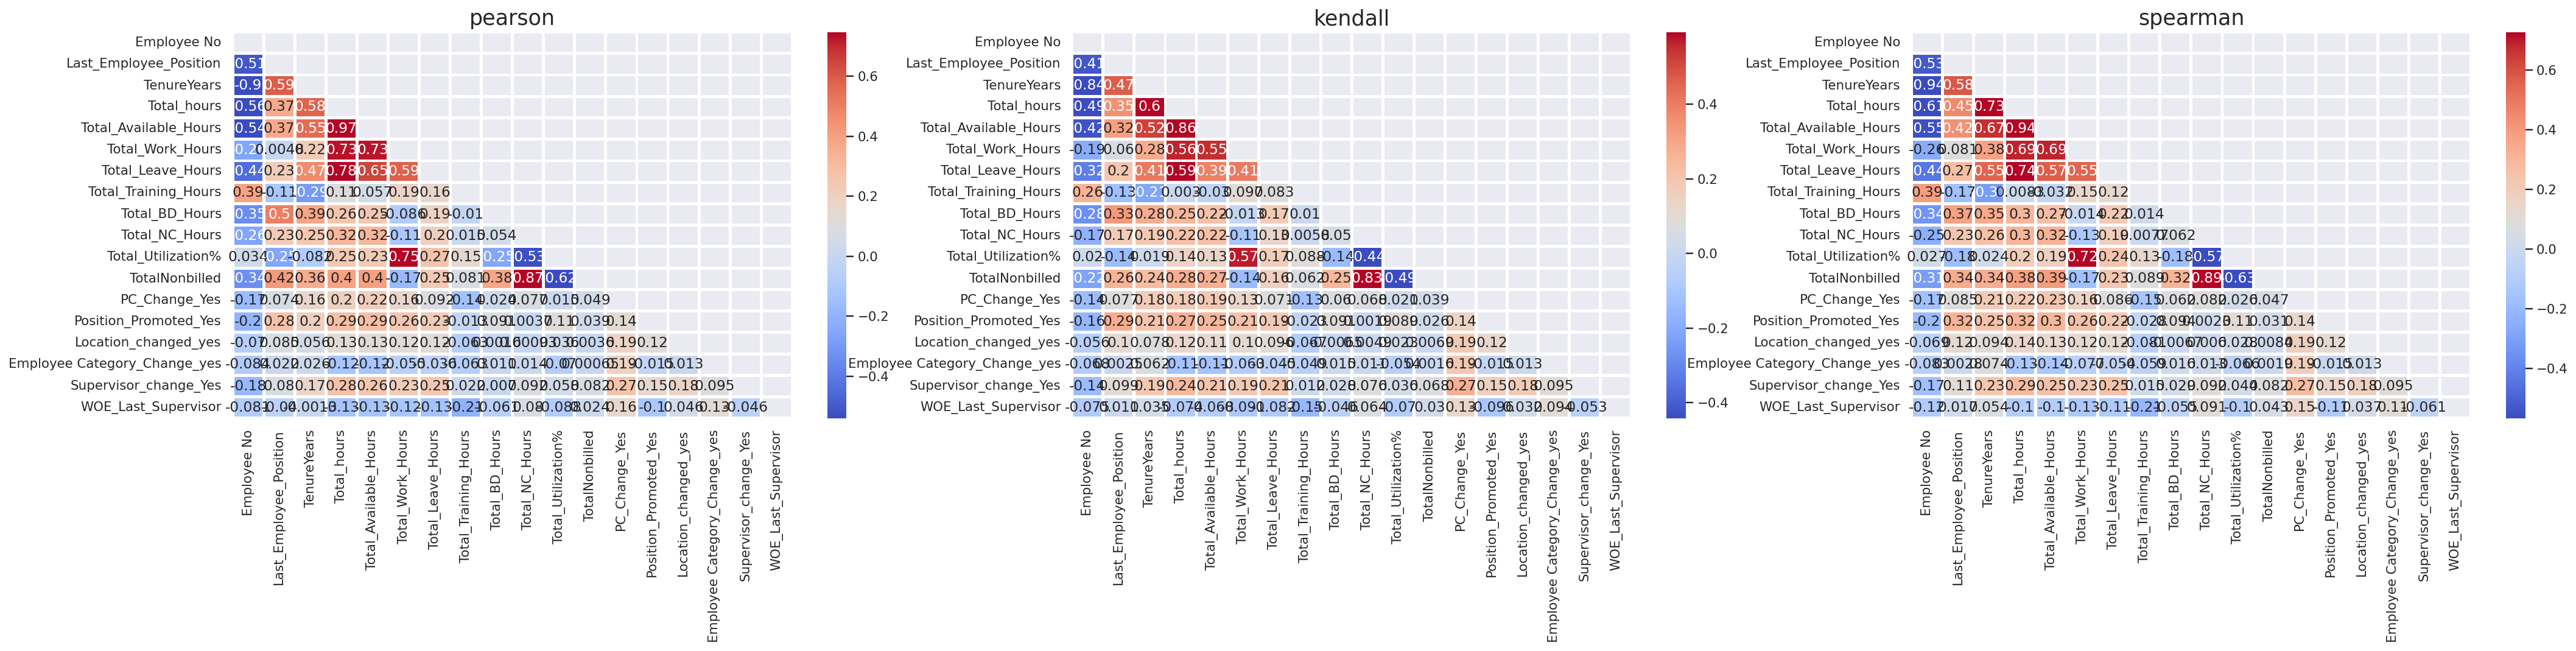

In [319]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, annot=True, cmap="coolwarm", mask= np.triu(numerical.corr()), robust=True)
  plt.title(i, fontsize=18)



In [320]:
# calculalting the correlation between independent variables
X_train.corr(method='kendall')

Employee No  \
Employee No                                      1.000000   
Last_Employee_Position                          -0.414681   
TenureYears                                     -0.841428   
Total_hours                                     -0.492442   
Total_Available_Hours                           -0.422140   
Total_Work_Hours                                -0.194613   
Total_Leave_Hours                               -0.319730   
Total_Training_Hours                             0.262042   
Total_BD_Hours                                  -0.276926   
Total_NC_Hours                                  -0.173914   
Total_Utilization%                               0.019699   
TotalNonbilled                                  -0.221342   
PC_Change_Yes                                   -0.140358   
Position_Promoted_Yes                           -0.161481   
Location_changed_yes                            -0.056240   
Employee Category_Change_yes                    -0.067946   
Supervisor_change_Yes                           -0.141287   
WOE_Last_Supervisor                             -0.075156   
ProfCenter_PC - 2                                0.011075   
ProfCenter_PC - 3                                0.031528   
ProfCenter_PC - 4                               -0.050473   
ProfCenter_PC - 6                               -0.078022   
ProfCenter_PC - 5                               -0.078763   
ProfCenter_PC - 7                               -0.038443   
ProfCenter_PC - 10                              -0.004315   
Location_Location 7                             -0.024247   
Location_Location 1                              0.054402   
Location_Location 9                              0.031367   
Location_Location 2                             -0.057323   
Location_Location 8                              0.047513   
Location_Location 4                             -0.034987   
Location_Location 6                             -0.019922   
Location_Location 5                              0.005101   
category_Resigned                               -0.008675   
category_Level 1/2                              -0.050473   
category_Confirmed Staff                        -0.048717   
category_Serving Notice Period                  -0.185110   
category_Confirmed Staff (Part-Time 4 Hours)    -0.045635   
category_Secondee-Outward-Without Pay           -0.072934   
category_Awaiting Termination                   -0.038489   
category_Confirmed-Sabbatical                   -0.020262   
category_Staff on Probation                      0.394359   
category_Fixed term Staff                        0.062081   

                                              Last_Employee_Position  \
Employee No                                                -0.414681   
Last_Employee_Position                                      1.000000   
TenureYears                                                 0.466906   
Total_hours                                                 0.353047   
Total_Available_Hours                                       0.317425   
Total_Work_Hours                                            0.059563   
Total_Leave_Hours                                           0.199216   
Total_Training_Hours                                       -0.126991   
Total_BD_Hours                                              0.331697   
Total_NC_Hours                                              0.173829   
Total_Utilization%                                         -0.139466   
TotalNonbilled                                              0.262133   
PC_Change_Yes                                               0.076686   
Position_Promoted_Yes                                       0.285636   
Location_changed_yes                                        0.104735   
Employee Category_Change_yes                                0.002534   
Supervisor_change_Yes                                       0.099130   
WOE_Last_Supervisor                                         0.010

In [321]:
# creating correlation matrix
corr_matrix = X_train.corr(method='kendall').abs()

In [322]:
# selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

As a general rule, we are dropping variables having Correlation Coefficient threshold greater than 0.7

*   Total_hours ∝ Total_Available_Hours : High_Correlation = 0.86
*   TotalNonbilled ∝ Total_NC_Hours : High_Correlation = 0.83


  We are dropping **Total_hours & TotalNonbilled** variables.

In [323]:
corrcol = ['Total_hours', 'TotalNonbilled']

In [324]:
# Drop unwanted columns

X_train.drop(corrcol,axis=1, inplace=True)
X_valid.drop(corrcol,axis=1, inplace=True)
X_test.drop(corrcol,axis=1, inplace=True)


In [325]:
# shape of new data
X_train.shape

(777, 42)

In [326]:
X_traindf = X_train.copy() #copying
X_validdf = X_valid.copy()
X_testdf = X_test.copy()



## 5.5 : Feature selection (using wrapper method)


### 5.51 :  SelectKBest

In [327]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction
skb = SelectKBest(score_func=f_classif,  k=10)
skb.fit_transform(X_train, y_train)

array([[0.56736894, 0.60729432, 0.625     , ..., 0.        , 1.        ,
        0.        ],
       [0.49080647, 0.42536047, 0.4375    , ..., 0.        , 1.        ,
        0.        ],
       [0.07337236, 0.27120441, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00619287, 0.02671756, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55854823, 0.677905  , 0.671875  , ..., 0.        , 1.        ,
        0.        ],
       [0.63448411, 0.70398643, 0.4375    , ..., 0.        , 1.        ,
        0.        ]])

In [328]:
X_train.columns[skb.get_support()] # Top 10 SelectKBest features

Index(['Total_Available_Hours', 'Total_Work_Hours', 'Total_Leave_Hours',
       'Total_Training_Hours', 'Employee Category_Change_yes',
       'WOE_Last_Supervisor', 'Supervisor_grade', 'category_Resigned',
       'category_Confirmed Staff', 'category_Serving Notice Period'],
      dtype='object')

In [329]:
feature_ranking = pd.DataFrame(skb.scores_, index=X_train.columns, columns=['SelectKBest_f_classif']) # feature_ranking dataframe
feature_ranking.sort_values(by='SelectKBest_f_classif', ascending=False)

SelectKBest_f_classif
category_Confirmed Staff                                 891.219310
category_Resigned                                        605.983540
category_Serving Notice Period                           352.324710
Total_Available_Hours                                    117.277050
WOE_Last_Supervisor                                       96.791045
Employee Category_Change_yes                              94.824526
Total_Training_Hours                                      90.484187
Total_Leave_Hours                                         73.560178
Supervisor_grade                                          71.654662
Total_Work_Hours                                          63.191662
Position_Promoted_Yes                                     52.811311
ProfCenter_PC - 5                                         52.269605
ProfCenter_PC - 6                                         48.728996
Employee No                                               31.667387
category_Staff on Probation                               25.549600
Supervisor_change_Yes                                     19.599445
Last_Employee_Position                                    15.066340
Total_Utilization%                                         8.744616
Location_Location 8                                        4.344548
ProfCenter_PC - 3                                          3.470640
Location_changed_yes                                       3.444838
ProfCenter_PC - 7                                          3.012950
ProfCenter_PC - 10                                         3.012950
PC_Change_Yes                                              2.879697
TenureYears                                                2.788307
Total_BD_Hours                                             2.692020
Location_Location 7                                        2.558690
Location_Location 2                                        1.790122
category_Secondee-Outward-Without Pay                      1.673881
Location_Location 5                                        1.673881
Location_Location 9                                        1.632400
Location_Location 1                                        1.526901
category_Awaiting Termination                              0.669536
category_Confirmed-Sabbatical                              0.666095
category_Fixed term Staff                                  0.666095
Total_NC_Hours                                             0.443672
ProfCenter_PC - 4                                          0.332475
category_Confirmed Staff (Part-Time 4 Hours)               0.332475
category_Level 1/2                                         0.332475
Location_Location 6                                        0.221908
Location_Location 4                                        0.200880
ProfCenter_PC - 2                                          0.187502

### 5.52 : Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)


In [330]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
skbchi = SelectKBest(score_func=chi2, k=20)
skbchi.fit_transform(X_train, y_train)

array([[8.42000000e+02, 5.00000000e+00, 5.67368936e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.18000000e+02, 5.00000000e+00, 4.90806474e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00700000e+03, 6.00000000e+00, 7.33723558e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.08100000e+03, 6.00000000e+00, 6.19287433e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.95000000e+02, 5.00000000e+00, 5.58548232e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.56000000e+02, 5.00000000e+00, 6.34484105e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [331]:
# feature_ranking = pd.DataFrame(skbchi.scores_, index=X_train.columns, columns=['SKBCHI2'])
feature_ranking['SKBCHI2'] = skbchi.scores_
feature_ranking.sort_values(by='SKBCHI2', ascending=False)

SelectKBest_f_classif  \
Employee No                                               31.667387   
category_Resigned                                        605.983540   
category_Serving Notice Period                           352.324710   
category_Confirmed Staff                                 891.219310   
Employee Category_Change_yes                              94.824526   
Supervisor_grade                                          71.654662   
ProfCenter_PC - 5                                         52.269605   
ProfCenter_PC - 6                                         48.728996   
Position_Promoted_Yes                                     52.811311   
category_Staff on Probation                               25.549600   
Total_Available_Hours                                    117.277050   
Supervisor_change_Yes                                     19.599445   
Total_Leave_Hours                                         73.560178   
Total_Training_Hours                                      90.484187   
WOE_Last_Supervisor                                       96.791045   
Total_Work_Hours                                          63.191662   
Last_Employee_Position                                    15.066340   
Location_Location 8                                        4.344548   
Location_changed_yes                                       3.444838   
ProfCenter_PC - 7                                          3.012950   
ProfCenter_PC - 10                                         3.012950   
PC_Change_Yes                                              2.879697   
ProfCenter_PC - 3                                          3.470640   
Total_BD_Hours                                             2.692020   
Location_Location 7                                        2.558690   
Total_Utilization%                                         8.744616   
Location_Location 2                                        1.790122   
Location_Location 5                                        1.673881   
category_Secondee-Outward-Without Pay                      1.673881   
Location_Location 9                                        1.632400   
Location_Location 1                                        1.526901   
TenureYears                                                2.788307   
category_Awaiting Termination                              0.669536   
category_Confirmed-Sabbatical                              0.666095   
category_Fixed term Staff                                  0.666095   
category_Confirmed Staff (Part-Time 4 Hours)               0.332475   
ProfCenter_PC - 4                                          0.332475   
category_Level 1/2                                         0.332475   
Location_Location 6                                        0.221908   
Location_Location 4                                        0.200880   
ProfCenter_PC - 2                                          0.187502   
Total_NC_Hours                                             0.443672   

                                                  SKBCHI2  
Employee No                                   5641.470841  
category_Resigned                              297.510309  
category_Serving Notice Period                 207.833582  
category_Confirmed Staff                       159.392796  
Employee Category_Change_yes                    69.333982  
Supervisor_grade                                56.661587  
ProfCenter_PC - 5                               48.082474  
ProfCenter_PC - 6                               45.077320  
Position_Promoted_Yes                           41.595197  
category_Staff on Probation                     22.627787  
Total_Available_Hours                           17.753600  
Supervisor_change_Yes                           15.046148  
Total_Leave_Hours                               12.612182  
Total_Training_Hours                             9.850794  
WOE_Last_Supervisor                              8.307500  
Total_Work_Hours                

In [332]:
feature_ranking['Total_Score'] = feature_ranking.apply(sum, axis=1)
featStatistical= feature_ranking.sort_values(by='Total_Score', ascending=False)

In [333]:
finalstats= featStatistical.iloc[:,:20]
finalstats

SelectKBest_f_classif  \
Employee No                                               31.667387   
category_Confirmed Staff                                 891.219310   
category_Resigned                                        605.983540   
category_Serving Notice Period                           352.324710   
Employee Category_Change_yes                              94.824526   
Total_Available_Hours                                    117.277050   
Supervisor_grade                                          71.654662   
WOE_Last_Supervisor                                       96.791045   
ProfCenter_PC - 5                                         52.269605   
Total_Training_Hours                                      90.484187   
Position_Promoted_Yes                                     52.811311   
ProfCenter_PC - 6                                         48.728996   
Total_Leave_Hours                                         73.560178   
Total_Work_Hours                                          63.191662   
category_Staff on Probation                               25.549600   
Supervisor_change_Yes                                     19.599445   
Last_Employee_Position                                    15.066340   
Total_Utilization%                                         8.744616   
Location_Location 8                                        4.344548   
Location_changed_yes                                       3.444838   
ProfCenter_PC - 10                                         3.012950   
ProfCenter_PC - 7                                          3.012950   
ProfCenter_PC - 3                                          3.470640   
PC_Change_Yes                                              2.879697   
Total_BD_Hours                                             2.692020   
Location_Location 7                                        2.558690   
TenureYears                                                2.788307   
Location_Location 2                                        1.790122   
Location_Location 5                                        1.673881   
category_Secondee-Outward-Without Pay                      1.673881   
Location_Location 9                                        1.632400   
Location_Location 1                                        1.526901   
category_Awaiting Termination                              0.669536   
category_Confirmed-Sabbatical                              0.666095   
category_Fixed term Staff                                  0.666095   
category_Level 1/2                                         0.332475   
ProfCenter_PC - 4                                          0.332475   
category_Confirmed Staff (Part-Time 4 Hours)               0.332475   
Total_NC_Hours                                             0.443672   
Location_Location 6                                        0.221908   
Location_Location 4                                        0.200880   
ProfCenter_PC - 2                                          0.187502   

                                                  SKBCHI2  Total_Score  
Employee No                                   5641.470841  5673.138228  
category_Confirmed Staff                       159.392796  1050.612106  
category_Resigned                              297.510309   903.493849  
category_Serving Notice Period                 207.833582   560.158292  
Employee Category_Change_yes                    69.333982   164.158508  
Total_Available_Hours                           17.753600   135.030651  
Supervisor_grade                                56.661587   128.316249  
WOE_Last_Supervisor                              8.307500   105.098546  
ProfCenter_PC - 5                               48.082474   100.352079  
Total_Training_Hours                             9.850794   100.334981  
Position_Promoted_Yes                           41.595197    94.406508  
ProfCenter_PC - 6                               45.077320    93.806316  
Total_Leave_Hours                          

### 5.53 : Recursive feature extraction

In [334]:
# Recursive feature extraction
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
LR = LogisticRegression(class_weight='balanced')

# feature extraction
rfe = RFE(estimator=LR, n_features_to_select=20)
rfe.fit_transform(X_train, y_train)

array([[0.56736894, 0.625     , 0.81326718, ..., 0.        , 0.        ,
        0.        ],
       [0.49080647, 0.4375    , 0.6040797 , ..., 0.        , 0.        ,
        0.        ],
       [0.07337236, 0.25      , 0.72789049, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.00619287, 0.        , 0.44327331, ..., 0.        , 1.        ,
        0.        ],
       [0.55854823, 0.671875  , 0.61843038, ..., 0.        , 0.        ,
        0.        ],
       [0.63448411, 0.4375    , 0.2901905 , ..., 0.        , 0.        ,
        0.        ]])

In [335]:
feature_ranking['RFE_support'] = rfe.support_
feature_ranking['RFE'] = 100/rfe.ranking_

In [336]:
feature_ranking.sort_values(by='RFE', ascending=False).T

ProfCenter_PC - 5 Supervisor_grade  \
SelectKBest_f_classif         52.269605        71.654662   
SKBCHI2                       48.082474        56.661587   
Total_Score                  100.352079       128.316249   
RFE_support                        True             True   
RFE                               100.0            100.0   

                      category_Staff on Probation  \
SelectKBest_f_classif                     25.5496   
SKBCHI2                                 22.627787   
Total_Score                             48.177387   
RFE_support                                  True   
RFE                                         100.0   

                      category_Awaiting Termination  \
SelectKBest_f_classif                      0.669536   
SKBCHI2                                    0.668958   
Total_Score                                1.338494   
RFE_support                                    True   
RFE                                           100.0   

                      category_Secondee-Outward-Without Pay  \
SelectKBest_f_classif                              1.673881   
SKBCHI2                                            1.663808   
Total_Score                                        3.337689   
RFE_support                                            True   
RFE                                                   100.0   

                      category_Serving Notice Period category_Confirmed Staff  \
SelectKBest_f_classif                      352.32471                891.21931   
SKBCHI2                                   207.833582               159.392796   
Total_Score                               560.158292              1050.612106   
RFE_support                                     True                     True   
RFE                                            100.0                    100.0   

                      category_Resigned Location_Location 8  \
SelectKBest_f_classif         605.98354            4.344548   
SKBCHI2                      297.510309             4.15309   
Total_Score                  903.493849            8.497638   
RFE_support                        True                True   
RFE                               100.0               100.0   

                      Location_Location 2 Location_Location 7  \
SelectKBest_f_classif            1.790122             2.55869   
SKBCHI2                          1.726079            1.865811   
Total_Score                      3.516201              4.4245   
RFE_support                          True                True   
RFE                                 100.0               100.0   

                      ProfCenter_PC - 6 ProfCenter_PC - 3  \
SelectKBest_f_classif         48.728996           3.47064   
SKBCHI2                        45.07732          2.144433   
Total_Score                   93.806316          5.615073   
RFE_support                        True              True   
RFE                               100.0             100.0   

                      category_Fixed term Staff Employee Category_Change_yes  \
SelectKBest_f_classif                  0.666095                    94.824526   
SKBCHI2                                0.665523                    69.333982   
Total_Score                            1.331618                   164.158508   
RFE_support                                True                         True   
RFE                                       100.0                        100.0   

                      Total_Available_Hours Position_Promoted_Yes  \
SelectKBest_f_classif             117.27705             52.811311   
SKBCHI2                             17.7536             41.595197   
Total_Score                      135.030651             94.406508   
RFE_support                            True                  True   
RFE                                   100.0                 100.0   

                      Total_Leave_Hours Total_Training_Hours PC_Change_Yes  \
SelectKBest_f_classif         73.5

In [337]:
finaltotal= feature_ranking.sort_values(by='Total_Score', ascending=False).T
finaltotal

Employee No category_Confirmed Staff category_Resigned  \
SelectKBest_f_classif    31.667387                891.21931         605.98354   
SKBCHI2                5641.470841               159.392796        297.510309   
Total_Score            5673.138228              1050.612106        903.493849   
RFE_support                  False                     True              True   
RFE                       4.347826                    100.0             100.0   

                      category_Serving Notice Period  \
SelectKBest_f_classif                      352.32471   
SKBCHI2                                   207.833582   
Total_Score                               560.158292   
RFE_support                                     True   
RFE                                            100.0   

                      Employee Category_Change_yes Total_Available_Hours  \
SelectKBest_f_classif                    94.824526             117.27705   
SKBCHI2                                  69.333982               17.7536   
Total_Score                             164.158508            135.030651   
RFE_support                                   True                  True   
RFE                                          100.0                 100.0   

                      Supervisor_grade WOE_Last_Supervisor ProfCenter_PC - 5  \
SelectKBest_f_classif        71.654662           96.791045         52.269605   
SKBCHI2                      56.661587              8.3075         48.082474   
Total_Score                 128.316249          105.098546        100.352079   
RFE_support                       True               False              True   
RFE                              100.0            7.142857             100.0   

                      Total_Training_Hours Position_Promoted_Yes  \
SelectKBest_f_classif            90.484187             52.811311   
SKBCHI2                           9.850794             41.595197   
Total_Score                     100.334981             94.406508   
RFE_support                           True                  True   
RFE                                  100.0                 100.0   

                      ProfCenter_PC - 6 Total_Leave_Hours Total_Work_Hours  \
SelectKBest_f_classif         48.728996         73.560178        63.191662   
SKBCHI2                        45.07732         12.612182         8.246199   
Total_Score                   93.806316          86.17236        71.437861   
RFE_support                        True              True            False   
RFE                               100.0             100.0             6.25   

                      category_Staff on Probation Supervisor_change_Yes  \
SelectKBest_f_classif                     25.5496             19.599445   
SKBCHI2                                 22.627787             15.046148   
Total_Score                             48.177387             34.645593   
RFE_support                                  True                 False   
RFE                                         100.0             14.285714   

                      Last_Employee_Position Total_Utilization%  \
SelectKBest_f_classif               15.06634           8.744616   
SKBCHI2                             4.578036           1.767752   
Total_Score                        19.644376          10.512367   
RFE_support                            False              False   
RFE                                 6.666667          11.111111   

                      Location_Location 8 Location_changed_yes  \
SelectKBest_f_classif            4.344548             3.444838   
SKBCHI2                           4.15309             3.310111   
Total_Score                      8.497638             6.754949   
RFE_support                          True                False   
RFE                                 100.0             8.333333   

                      ProfCenter_PC - 10 ProfCenter_PC - 7 ProfCenter_PC - 3  \
SelectKBest_f_classif            3.01295           3

## 5.6 : Final Features

dropping **category_Resigned** from base cols as it is created only after attrition of employees

After checking with different feature selection/ filter methods , we Manually Selected the following features.



* category_Confirmed Staff
* category_Fixed term Staff
* category_Serving Notice Period
* category_Staff on Probation
* category_Secondee-Outward-Without Pay	
* category_Awaiting Termination		

----------
* Category_Change_yes	
* Supervisor_change_Yes
* Position_Promoted_Yes
* PC_Change_Yes

-----------
* Total_Available_Hours
* Total_Training_Hours
* Total_Leave_Hours

-------
* Location_Location 8
* Location_Location 2	
* Location_Location 7	

--------
* ProfCenter_PC - 3
* ProfCenter_PC - 4	
* ProfCenter_PC - 5
* ProfCenter_PC - 6	

-----
* Supervisor_grade

------



In [338]:
Basecols = ['category_Confirmed Staff','category_Serving Notice Period', 'Employee Category_Change_yes','Total_Available_Hours',	'ProfCenter_PC - 5',	'Total_Training_Hours',	'Position_Promoted_Yes', 'ProfCenter_PC - 6',	'Total_Leave_Hours', 'category_Staff on Probation',	'Supervisor_change_Yes', 'Location_Location 8','ProfCenter_PC - 3', 'Location_Location 7', 'Location_Location 2', 'category_Secondee-Outward-Without Pay', 'category_Awaiting Termination', 'category_Fixed term Staff', 'ProfCenter_PC - 4', 'Supervisor_grade', 'PC_Change_Yes']

In [339]:
len(Basecols)

21

In [340]:
X_train = X_train[Basecols] # final dataframe
X_valid = X_valid[Basecols]
X_test = X_test[Basecols]

In [341]:
X_trainModels = X_train.copy() #copying for Modeling
X_validModels = X_valid.copy()
X_testModels = X_test.copy()



# 6.0 Model Development

 Importing Dataset and Fitting Logistic Regression Model

We use the pre-processed dataset to create a regularized logistic regression model and then fit it on the train dataset.

#### **6.1 Regularized Logistic Regression**

In [342]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve


LR = LogisticRegression(solver='liblinear', class_weight='balanced')

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [343]:
from sklearn.model_selection import GridSearchCV
lr= GridSearchCV(LR, tuned_parameters,cv=10)

In [344]:
lr.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [345]:
print(lr.best_params_)

{'C': 10, 'penalty': 'l1'}


In [346]:
log_model= LogisticRegression(random_state = 42, solver='liblinear', class_weight='balanced', penalty='l1', C=10) 
log_model.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

#### 6.2 dropping features of zero Coefficient strength

In [347]:
coef = log_model.coef_[0]
imp_features = pd.Series(X_train.columns)[list(coef!=0)]
X_train = X_train[imp_features]
X_valid = X_valid[imp_features] 
X_test = X_test[imp_features]


In [348]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced')

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }
from sklearn.model_selection import GridSearchCV
lr= GridSearchCV(LR, tuned_parameters,cv=10)

In [349]:
lr.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [350]:
print(lr.best_params_)

{'C': 10, 'penalty': 'l1'}


In [351]:
# retraining models again
log_model= LogisticRegression(random_state = 42, solver='liblinear', class_weight='balanced', penalty='l1', C=10) 
log_model.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

#### 6.3 Predicting on Validation dataset:

We use the above-created logistic regression model and predict the values of the dependent variable in the Validation dataset.

In [352]:
pred_log = log_model.predict(X_valid)


## 6.4 Evaluating model performance


### 6.41 Accuracy Score

Accuracy Score can be calculated using metrics.



In [353]:
metrics.accuracy_score(y_valid,pred_log)


0.9520958083832335

The accuracy score for the logistic regression model comes out to be 0.952




### 6.42 Confusion Matrix

Confusion matrix is one of the most powerful and commonly used evaluation technique as it allows us to compute a whole lot of other metrics that allow us to evaluate the performance of a classification model.

In [354]:
cm = metrics.confusion_matrix(y_valid,pred_log)
cm

array([[118,   7],
       [  1,  41]])

Representing the Confusion Matrix in a heat map format by using the seaborn package.

Text(0.5, 12.5, 'Predicted label')

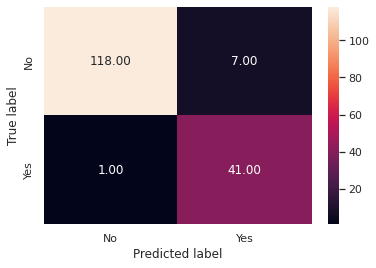

In [355]:
import seaborn as sn
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

Various types of metrics can be calculated using the confusion matrix and in order to do so, we create a classification report.

### 6.43 Classification Report

In [356]:
print(metrics.classification_report(y_valid,pred_log,digits=2))


              precision    recall  f1-score   support

           0       0.99      0.94      0.97       125
           1       0.85      0.98      0.91        42

    accuracy                           0.95       167
   macro avg       0.92      0.96      0.94       167
weighted avg       0.96      0.95      0.95       167



AUC and ROC
In logistic regression, the values are predicted on the basis of probability. Here logistic regression computes the probability of the attrition of the employees. By default, it takes the cut off value equal to 0.5, i.e. any probability value greater than 0.5 will be accounted as 1 (attrition) and any value less than 0.5 will be accounted as 0 (no attrition).

In order to improve the accuracy of the model, we can change the value of this cut-off. The new value of cut off can be decided by using the ROC curve.

### 6.44 : AUC

First we will predict the probability values from logistic regression model for our dataset

In [357]:
predict_proba = pd.DataFrame(log_model.predict_proba(X_valid))
predict_proba.head()

0         1
0  0.987378  0.012622
1  0.998040  0.001960
2  0.999402  0.000598
3  0.065376  0.934624
4  0.999136  0.000864

We will now make a dataset containing actual values of the attrition variable (dependent variable), predicted values and probabilities of attrition. To do this, we first start with converting predicted values of attrition to a data frame for merging datasets.

In [358]:
pred_log = pd.DataFrame(pred_log)


We now reset the index for y_valid


In [359]:
y_valid1 = y_valid.reset_index()

We then concatenate datasets using pd.concat


In [360]:
predictions = pd.concat([y_valid1,pred_log,predict_proba],axis = 1)


Finally, the columns of the dataset are renamed and we get the final table that allows us to calculate the AUC score and create ROC Curve.

In [361]:
predictions.columns = ['index', 'actual', 'predicted', 'attrition_0', 'attrition_1']
predictions.head()

index  actual  predicted  attrition_0  attrition_1
0   1065       0          0     0.987378     0.012622
1    990       0          0     0.998040     0.001960
2    954       0          0     0.999402     0.000598
3    663       1          1     0.065376     0.934624
4   1099       0          0     0.999136     0.000864

We use the above table to compute the AUC score i.e. the Area Under the Curve.

In [362]:
auc_score = metrics.roc_auc_score( predictions.actual, predictions.attrition_1 )
round( float( auc_score ), 2 )

0.99

### 6.45 AUC ROC Curve

We now calculate the False Positivity Rate, True Positivity Rate and Threshold and use them to plot the ROC curve(Receiver Operating Characteristic).

Text(0.5, 0, 'False Positive Rate')

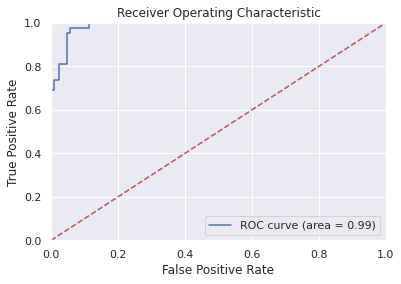

In [363]:
fpr, tpr, threshold = metrics.roc_curve(y_valid,predictions.attrition_1,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='ROC curve (area = %0.2f)' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Best Threshold=0.782603, G-Mean=0.960
Youden’s J statistic Best Threshold=0.782603


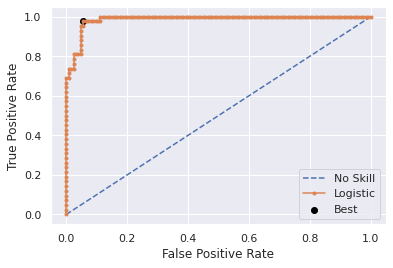

In [364]:
fpr, tpr, threshold = metrics.roc_curve(y_valid,predictions.attrition_1,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

# get the best threshold using Youden’s J statistic
J = tpr - fpr
ix = argmax(J)
best_thresh = threshold[ix]
print('Youden’s J statistic Best Threshold=%f' % (best_thresh))


# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()



### 6.46 Optimal Cutoff Point using Precision-Recall Curve


Best Threshold=0.782603, F-Score=0.911


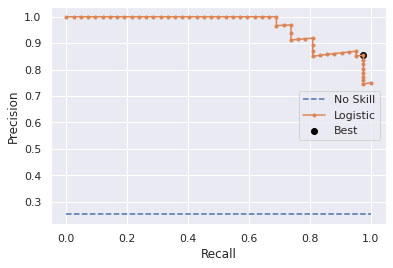

In [365]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_valid, predictions.attrition_1)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the roc curve for the model
no_skill = len(y_valid[y_valid==1]) / len(y_valid)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

The ideal cutoff comes out to be 0.782

We will now predict the attrition by using the new cut off value.

In [366]:
predictions['new_labels'] = predictions['attrition_1'].map( lambda x: 1 if x >= 0.782603 else 0 )
predictions.head()

index  actual  predicted  attrition_0  attrition_1  new_labels
0   1065       0          0     0.987378     0.012622           0
1    990       0          0     0.998040     0.001960           0
2    954       0          0     0.999402     0.000598           0
3    663       1          1     0.065376     0.934624           1
4   1099       0          0     0.999136     0.000864           0

We create new Confusion Matrix with actual and new values.

Text(0.5, 12.5, 'Predicted label')

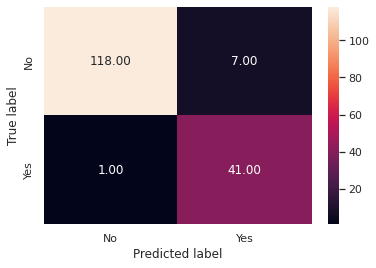

In [367]:

cm1 = metrics.confusion_matrix( predictions.actual, predictions.new_labels )
sn.heatmap(cm1, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)


We also calculate the new Accuracy Score.


In [368]:
metrics.accuracy_score(predictions.actual,predictions.new_labels)


0.9520958083832335

We notice no change in our accuracy from 0.952

A new Classification report can be generated using the new outcome from the new cut-off value.

In [369]:
print(metrics.classification_report(predictions.actual,predictions.new_labels,digits=2))


              precision    recall  f1-score   support

           0       0.99      0.94      0.97       125
           1       0.85      0.98      0.91        42

    accuracy                           0.95       167
   macro avg       0.92      0.96      0.94       167
weighted avg       0.96      0.95      0.95       167



## 6.5 Cross validation

Cross-validation scores:[1.         1.         1.         1.         0.96153846 1.
 1.         1.         1.         0.91666667]
min : 0.9166666666666666 max 1.0
Mean CV roc_auc_score is:  0.988
Mean roc_auc_score Percentage is:  98.78205128205127
standard deviation of roc_auc_score Percentage is:  2.63445161385058


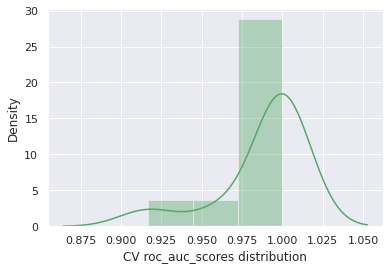

In [370]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
roc_auc_scores = cross_val_score(log_model, X_valid, y_valid, cv = 10, scoring='roc_auc')
print('Cross-validation scores:{}'.format(roc_auc_scores))
print("min :" ,roc_auc_scores.min(),"max", roc_auc_scores.max())
print('Mean CV roc_auc_score is: ', round(np.mean(roc_auc_scores),3))
print('Mean roc_auc_score Percentage is: ', roc_auc_scores.mean()*100)
print('standard deviation of roc_auc_score Percentage is: ',  roc_auc_scores.std()*100)

pltt = sns.distplot(pd.Series(roc_auc_scores,name='CV roc_auc_scores distribution'), color='g')

Cross-validation scores:[0.85714286 0.85714286 0.88888889 0.8        0.72727273 0.83333333
 1.         0.88888889 1.         0.75      ]
min : 0.7272727272727273 max 1.0
Mean CV f1_score is:  0.86
Mean f1_scores Percentage is:  86.02669552669553
standard deviation of f1_scores Percentage is:  8.65519437786736


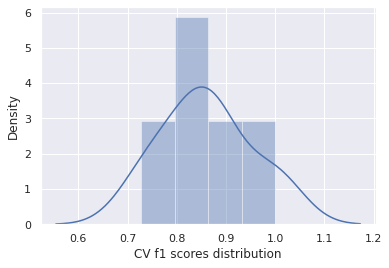

In [371]:
f1_scores = cross_val_score(log_model, X_valid, y_valid, cv = 10, scoring='f1')
print('Cross-validation scores:{}'.format(f1_scores))
print("min :" ,f1_scores.min(),"max", f1_scores.max())
print('Mean CV f1_score is: ', round(np.mean(f1_scores),3))
print('Mean f1_scores Percentage is: ', f1_scores.mean()*100)
print('standard deviation of f1_scores Percentage is: ',  f1_scores.std()*100)
      
pltt = sns.distplot(pd.Series(f1_scores,name='CV f1 scores distribution'), color='b')


**Logistic Regression:** 
* Mean roc_auc_score Percentage is:  98.782 & standard deviation of roc_auc_score Percentage is:  2.634
* Mean f1_scores Percentage is:  86.026 & standard deviation of f1_scores Percentage is:  8.655


# 7.0 Decision Tree Classifier

In [372]:
X_train = X_trainModels
X_valid = X_validModels
X_test = X_testModels


In [373]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Create Decision Tree classifer object
DT_model = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
DT_model = DT_model.fit(X_train,y_train)

#Predict the response for Valid dataset
y_pred = DT_model.predict(X_valid)

In [374]:
import graphviz
dot_data = tree.export_graphviz(DT_model, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names="Attrition",  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("DTmodel")

'DTmodel.pdf'

In [375]:
from sklearn.model_selection import  cross_val_score
# 10 Folds Cross Validation 
clf_score = cross_val_score(DT_model, X_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.91025641 0.91025641 0.96153846 0.97435897 0.98717949 0.96153846
 0.97435897 1.         0.94805195 0.96103896]


0.9588578088578089

## 7.1 Feature Importance


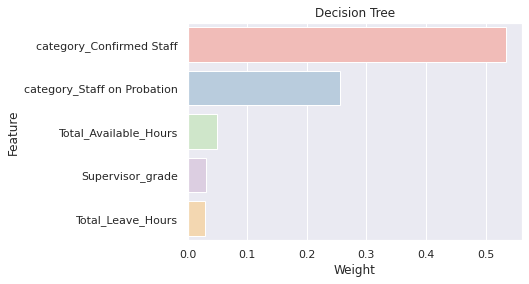

In [376]:
DT_fea = pd.DataFrame(DT_model.feature_importances_)
DT_fea["Feature"] = list(X_train) 
DT_fea.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"Feature",data = DT_fea.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Decision Tree")


## 7.2 Evaluating Model


#### 7.21 Confusion Matrix

In [377]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
y_pred = DT_model.predict(X_valid)
probs = DT_model.predict_proba(X_valid)
cm = metrics.confusion_matrix(y_valid,y_pred)

Text(0.5, 12.5, 'Predicted label')

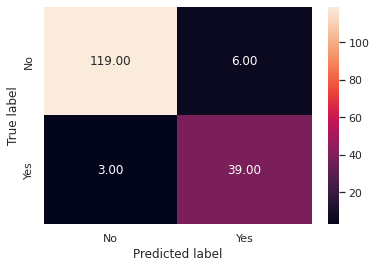

In [378]:
import seaborn as sn
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

### 7.22 Classification Report

In [379]:
print(metrics.classification_report(y_valid,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       125
           1       0.87      0.93      0.90        42

    accuracy                           0.95       167
   macro avg       0.92      0.94      0.93       167
weighted avg       0.95      0.95      0.95       167



### 7.23 AUC

In [380]:
# calculate AUC
auc = roc_auc_score(y_valid, probs[:,1])
print('AUC: %.3f' % auc)
print(y_train.shape)
print(probs.shape)

AUC: 0.940
(777,)
(167, 2)


### 7.24 AUC ROC Curve

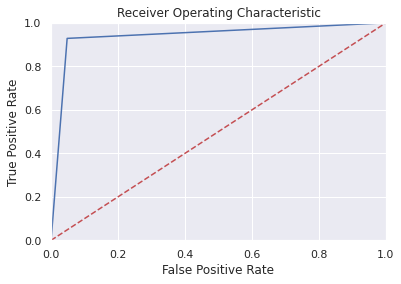

In [381]:
from sklearn.metrics import roc_curve
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_valid, probs[:,1])
plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



## 7.3 Cross validation

Cross-validation scores:[0.96153846 0.96153846 0.96153846 0.71153846 1.         1.
 1.         1.         0.875      0.83333333]
min : 0.7115384615384616 max 1.0
Mean CV roc_auc_score is:  0.93
Mean roc_auc_score Percentage is:  93.04487179487181
standard deviation of roc_auc_score Percentage is:  9.092683785444798


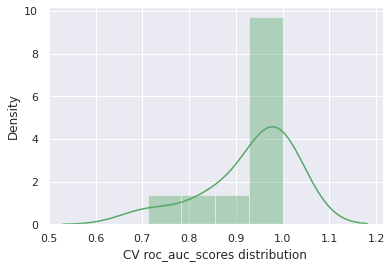

In [382]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
roc_auc_scores = cross_val_score(DT_model, X_valid, y_valid, cv = 10, scoring='roc_auc')
print('Cross-validation scores:{}'.format(roc_auc_scores))
print("min :" ,roc_auc_scores.min(),"max", roc_auc_scores.max())
print('Mean CV roc_auc_score is: ', round(np.mean(roc_auc_scores),3))
print('Mean roc_auc_score Percentage is: ', roc_auc_scores.mean()*100)
print('standard deviation of roc_auc_score Percentage is: ',  roc_auc_scores.std()*100)

pltt = sns.distplot(pd.Series(roc_auc_scores,name='CV roc_auc_scores distribution'), color='g')

Cross-validation scores:[0.88888889 0.88888889 0.88888889 0.57142857 1.         1.
 1.         1.         0.85714286 0.75      ]
min : 0.5714285714285715 max 1.0
Mean CV f1_score is:  0.885
Mean f1_scores Percentage is:  88.45238095238095
standard deviation of f1_scores Percentage is:  13.048799332550253


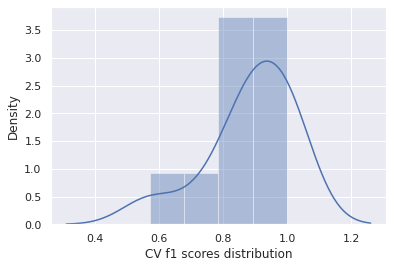

In [383]:
f1_scores = cross_val_score(DT_model, X_valid, y_valid, cv = 10, scoring='f1')
print('Cross-validation scores:{}'.format(f1_scores))
print("min :" ,f1_scores.min(),"max", f1_scores.max())
print('Mean CV f1_score is: ', round(np.mean(f1_scores),3))
print('Mean f1_scores Percentage is: ', f1_scores.mean()*100)
print('standard deviation of f1_scores Percentage is: ',  f1_scores.std()*100)
      
pltt = sns.distplot(pd.Series(f1_scores,name='CV f1 scores distribution'), color='b')


**Decision Tree Classifier:** 

* Mean roc_auc_score Percentage is:  93.044 & standard deviation of roc_auc_score Percentage is:  9.09

* Mean f1_scores Percentage is:  88.452 & standard deviation of f1_scores Percentage is:  13.048

# 8.0 Comparing Models

In [384]:
# Instantiate the classfiers and make a list
classifiers = [log_model,DT_model]

In [385]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [386]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_valid)[::,1]
    
    fpr, tpr, _ = roc_curve(y_valid,  yproba)
    auc = roc_auc_score(y_valid, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [387]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

## 8.1 Comparing Models ON **F1 SCORE**


In [388]:
print(metrics.classification_report(y_valid,pred_log,digits=2)) # LR Model


              precision    recall  f1-score   support

           0       0.99      0.94      0.97       125
           1       0.85      0.98      0.91        42

    accuracy                           0.95       167
   macro avg       0.92      0.96      0.94       167
weighted avg       0.96      0.95      0.95       167



In [389]:
print(metrics.classification_report(y_valid,y_pred,digits=2)) #DT Model

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       125
           1       0.87      0.93      0.90        42

    accuracy                           0.95       167
   macro avg       0.92      0.94      0.93       167
weighted avg       0.95      0.95      0.95       167



## 8.2 Comparing Models ON AUC ROC Curve & Confusion Matrix 


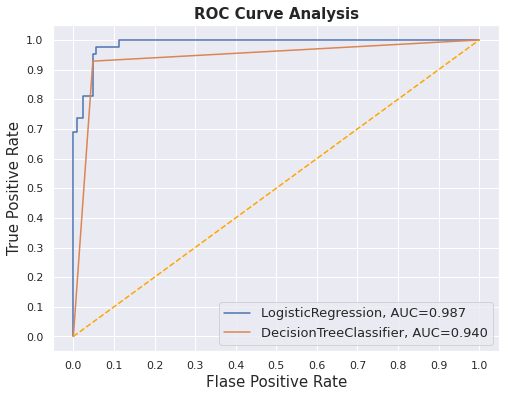

In [390]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [391]:
fig.savefig('multiple_roc_curve.png')

**Log Model**

Mean roc_auc_score Percentage is: 98.782 & standard deviation of roc_auc_score Percentage is: 2.634
Mean f1_scores Percentage is: 86.026 & standard deviation of f1_scores Percentage is: 8.655

**DT Model**

Mean roc_auc_score Percentage is: 93.044 & standard deviation of roc_auc_score Percentage is: 9.09

Mean f1_scores Percentage is: 88.452 & standard deviation of f1_scores Percentage is: 13.048

## 8.3 Selection of Model

Logistic Regression model is selected because

* It has high roc_auc_score than Decision Tree
* comparable F1 score percentage and low standard deviation than Decision Tree
* Logistic Regression has high recall (0.98) than Decision Tree (0.93)

## 8.4 : Saving Best Model


In [392]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(log_model)

# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)

------

# 9.0 Predicting on Test dataset

In [393]:
pred_log_Test = lr_from_pickle.predict(X_test)

## 9.1 Evaluating model performance on Test Data

### 9.11 Accuracy Score


In [394]:
metrics.accuracy_score(y_test,pred_log_Test)


0.9760479041916168

The accuracy score for the Test Dataset comes out to be 0.976




### 9.12 Confusion Matrix

In [395]:
cm = metrics.confusion_matrix(y_test,pred_log_Test)
cm

array([[122,   4],
       [  0,  41]])

Representing the Confusion Matrix in a heat map format by using the seaborn package.

Text(0.5, 12.5, 'Predicted label')

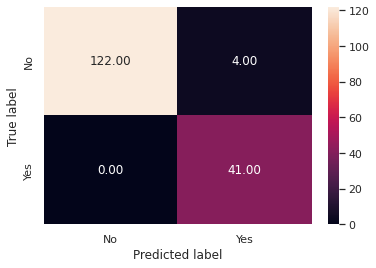

In [396]:
import seaborn as sn
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

### 9.13 classification_report

In [397]:
print(metrics.classification_report(y_test,pred_log_Test,digits=2))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       126
           1       0.91      1.00      0.95        41

    accuracy                           0.98       167
   macro avg       0.96      0.98      0.97       167
weighted avg       0.98      0.98      0.98       167



### 9.14  AUC

First we will predict the probability values from logistic regression model for our dataset

In [398]:
predict_proba = pd.DataFrame(log_model.predict_proba(X_test))
predict_proba.head()

0             1
0  0.012261  9.877389e-01
1  0.955884  4.411615e-02
2  1.000000  1.726980e-07
3  0.999822  1.776331e-04
4  0.999324  6.760485e-04

We will now make a dataset containing actual values of the attrition variable (dependent variable), predicted values and probabilities of attrition. To do this, we first start with converting predicted values of attrition to a data frame for merging datasets.

In [399]:
pred_log_Test = pd.DataFrame(pred_log_Test)


We now reset the index for y_test


In [400]:
y_test1 = y_test.reset_index()

We then concatenate datasets using pd.concat


In [401]:
predictions = pd.concat([y_test1,pred_log_Test,predict_proba],axis = 1)


Finally, the columns of the dataset are renamed and we get the final table that allows us to calculate the AUC score and create ROC Curve.

In [402]:
predictions.columns = ['index', 'actual', 'predicted', 'attrition_0', 'attrition_1']
predictions.head()

index  actual  predicted  attrition_0   attrition_1
0    679       1          1     0.012261  9.877389e-01
1    366       0          0     0.955884  4.411615e-02
2    471       0          0     1.000000  1.726980e-07
3    585       0          0     0.999822  1.776331e-04
4    547       0          0     0.999324  6.760485e-04

We use the above table to compute the AUC score i.e. the Area Under the Curve.

In [403]:
auc_score = metrics.roc_auc_score( predictions.actual, predictions.attrition_1 )
round( float( auc_score ), 2 )

0.99

### 9.15 AUC ROC Curve

We now calculate the False Positivity Rate, True Positivity Rate and Threshold and use them to plot the ROC curve(Receiver Operating Characteristic).

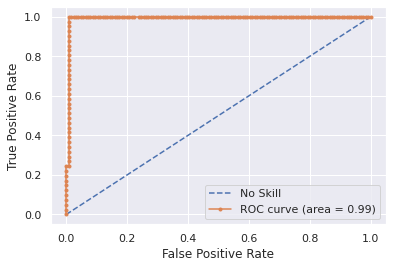

In [404]:
fpr, tpr, threshold = metrics.roc_curve(y_test,predictions.attrition_1,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.2f)' % auc_score)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()



### 9.16 Applying Optimal Cutoff Point calculated from train dataset

The ideal cutoff calculated to be 0.782

We will now predict the attrition by using the new cut off value.

In [405]:
predictions['new_labels'] = predictions['attrition_1'].map( lambda x: 1 if x >= 0.782603 else 0 )
predictions.head()

index  actual  predicted  attrition_0   attrition_1  new_labels
0    679       1          1     0.012261  9.877389e-01           1
1    366       0          0     0.955884  4.411615e-02           0
2    471       0          0     1.000000  1.726980e-07           0
3    585       0          0     0.999822  1.776331e-04           0
4    547       0          0     0.999324  6.760485e-04           0

We create new Confusion Matrix with actual and new values.

Text(0.5, 12.5, 'Predicted label')

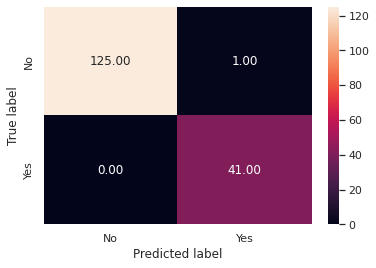

In [406]:
cm1 = metrics.confusion_matrix( predictions.actual, predictions.new_labels )
sn.heatmap(cm1, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)


We also calculate the new Accuracy Score.


In [407]:
metrics.accuracy_score(predictions.actual,predictions.new_labels)


0.9940119760479041

We notice change in our accuracy from 0.976 to 0.994

A new Classification report can be generated using the new outcome from the new cut-off value.

In [408]:
print(metrics.classification_report(predictions.actual,predictions.new_labels,digits=2))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       126
           1       0.98      1.00      0.99        41

    accuracy                           0.99       167
   macro avg       0.99      1.00      0.99       167
weighted avg       0.99      0.99      0.99       167



## 9.2 Cross validation

Cross-validation scores:[0.98333333 1.         0.92307692 1.         0.96153846 1.
 0.98076923 1.         1.         1.        ]
min : 0.9230769230769231 max 1.0
Mean CV roc_auc_sc for TEST dataset is:  0.985
Mean roc_auc_score Percentage for TEST dataset is:  98.48717948717949
standard deviation of roc_auc_score Percentage for TEST dataset is:  2.399046490403294


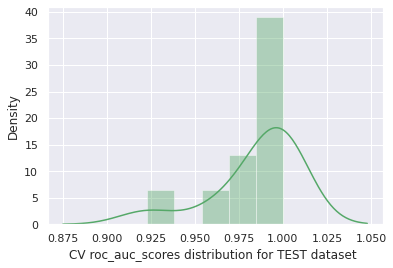

In [409]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
roc_auc_scores = cross_val_score(log_model, X_test, y_test, cv = 10, scoring='roc_auc')
print('Cross-validation scores:{}'.format(roc_auc_scores))
print("min :" ,roc_auc_scores.min(),"max", roc_auc_scores.max())
print('Mean CV roc_auc_sc for TEST dataset is: ', round(np.mean(roc_auc_scores),3))
print('Mean roc_auc_score Percentage for TEST dataset is: ', roc_auc_scores.mean()*100)
print('standard deviation of roc_auc_score Percentage for TEST dataset is: ',  roc_auc_scores.std()*100)

pltt = sns.distplot(pd.Series(roc_auc_scores,name='CV roc_auc_scores distribution for TEST dataset '), color='g')

Cross-validation scores:[1.         0.75       0.88888889 0.88888889 0.72727273 0.90909091
 0.88888889 1.         0.85714286 0.57142857]
min : 0.5714285714285715 max 1.0
Mean CV f1_score for TEST dataset is:  0.848
Mean f1_scores Percentage for TEST dataset is:  84.81601731601731
standard deviation of f1_scores Percentage for TEST dataset is:  12.478380008710497


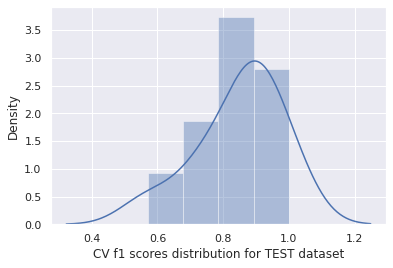

In [410]:
f1_scores = cross_val_score(log_model, X_valid, y_valid, cv = 10, scoring='f1')
print('Cross-validation scores:{}'.format(f1_scores))
print("min :" ,f1_scores.min(),"max", f1_scores.max())
print('Mean CV f1_score for TEST dataset is: ', round(np.mean(f1_scores),3))
print('Mean f1_scores Percentage for TEST dataset is: ', f1_scores.mean()*100)
print('standard deviation of f1_scores Percentage for TEST dataset is: ',  f1_scores.std()*100)
      
pltt = sns.distplot(pd.Series(f1_scores,name='CV f1 scores distribution for TEST dataset'), color='b')


** Cross validation results on TEST DATASET:** 

* Mean roc_auc_score Percentage for TEST dataset is:  98.487 & 

standard deviation of roc_auc_score Percentage for TEST dataset is:  2.399

* Mean f1_scores Percentage for TEST dataset is: 84.81 & 

standard deviation of f1_scores Percentage for TEST dataset is: 12.478

# 10.0 Model Insights

## 10.1 Top Feature importance & droping zero coef strength


In [411]:
coefficients = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":log_model.coef_[0]})
print(coefficients)

                                  Feature  Coefficients
0                category_Confirmed Staff    -15.437991
1          category_Serving Notice Period     -4.610872
2            Employee Category_Change_yes     -4.453441
3                   Total_Available_Hours     -1.138551
4                       ProfCenter_PC - 5      0.167835
5                    Total_Training_Hours     -3.134959
6                   Position_Promoted_Yes     -6.073399
7                       ProfCenter_PC - 6      0.844723
8                       Total_Leave_Hours     -1.723927
9             category_Staff on Probation    -15.370640
10                  Supervisor_change_Yes     -0.508354
11                    Location_Location 8      0.000000
12                      ProfCenter_PC - 3     -1.169770
13                    Location_Location 7      0.675384
14                    Location_Location 2      1.983767
15  category_Secondee-Outward-Without Pay    -12.283943
16          category_Awaiting Termination      0

## 10.2 Visualize feature importance & Feature Coefficient strength

Coeff value
category_Confirmed Staff                   -15.438
category_Staff on Probation                -15.371
category_Secondee-Outward-Without Pay      -12.284
ProfCenter_PC - 4                          -10.969
category_Fixed term Staff                  -10.805
Position_Promoted_Yes                       -6.073
category_Serving Notice Period              -4.611
Employee Category_Change_yes                -4.453
Total_Training_Hours                        -3.135
Location_Location 2                          1.984
Total_Leave_Hours                           -1.724
ProfCenter_PC - 3                           -1.170
Total_Available_Hours                       -1.139
ProfCenter_PC - 6                            0.845
Location_Location 7                          0.675
Supervisor_grade                             0.553
Supervisor_change_Yes                       -0.508
ProfCenter_PC - 5                            0.168
Location_Location 8                          0.000
category_Awaiting Termination                0.000
PC_Change_Yes                                0.000

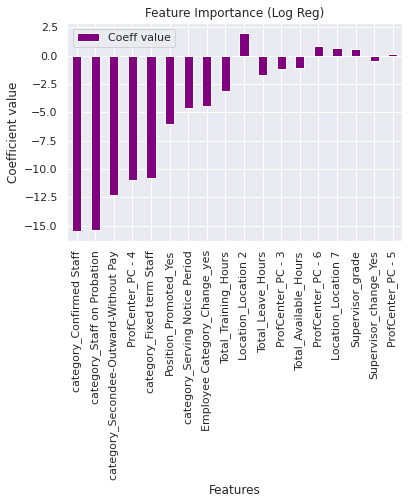

In [412]:
coeff=log_model.coef_
intercept = log_model.intercept_
coeffs_b= log_model.coef_[0,np.argsort(abs(log_model.coef_[0,:]))[::-1]]
names_b = list(X_train.columns[np.argsort(abs(log_model.coef_[0,:]))[::-1]])
logfimp = pd.DataFrame(np.round(coeffs_b,3),index=names_b,columns=['Coeff value'])
_ = logfimp.head(18).plot.bar(color='purple')
_ = plt.title('Feature Importance (Log Reg)')
_ = plt.ylabel('Coefficient value')
_ = plt.xlabel('Features')
logfimp

## 10.3 Interpretation: 

**Factors affecting attrition**

In [413]:
coefficients[coefficients['Coefficients'] > abs(0)]

Feature  Coefficients
4     ProfCenter_PC - 5      0.167835
7     ProfCenter_PC - 6      0.844723
13  Location_Location 7      0.675384
14  Location_Location 2      1.983767
19     Supervisor_grade      0.553497

Interpret Logistic Regression Coefficients

The logistic regression coefficient β associated with a predictor X is the expected change in log odds of having the outcome per unit change in X. So increasing the predictor by 1 unit (or going from 1 level to the next) multiplies the odds of having the outcome by eβ.

ProfCenter_PC - 6

The **ProfCenter_PC-6** has a 0.8447 times the odds of the other Profit centres of having attrition.

**Factors prevent attrition**

In [414]:
coefficients[coefficients['Coefficients'] < abs(0)]

Feature  Coefficients
0                category_Confirmed Staff    -15.437991
1          category_Serving Notice Period     -4.610872
2            Employee Category_Change_yes     -4.453441
3                   Total_Available_Hours     -1.138551
5                    Total_Training_Hours     -3.134959
6                   Position_Promoted_Yes     -6.073399
8                       Total_Leave_Hours     -1.723927
9             category_Staff on Probation    -15.370640
10                  Supervisor_change_Yes     -0.508354
12                      ProfCenter_PC - 3     -1.169770
15  category_Secondee-Outward-Without Pay    -12.283943
17              category_Fixed term Staff    -10.804542
18                      ProfCenter_PC - 4    -10.968831


----------positive-----

* category_Confirmed Staff
* category_Fixed term Staff
* category_Serving Notice Period
* category_Staff on Probation
* category_Secondee-Outward-Without Pay	

----------positive-----
* Supervisor_change_Yes
* Position_Promoted_Yes

-----------positive-----
* Total_Available_Hours
* Total_Training_Hours
* Total_Leave_Hours

-------danger-----
* Location_Location 2
* Location_Location 7

--------
* ProfCenter_PC - 3 == okay
* ProfCenter_PC - 4	-- happy
* ProfCenter_PC - 5 == Unhappy
* ProfCenter_PC - 6	-- Unhappy

-----
* Supervisor_grade --- 4 level (danger)

------



**HIGH PERFORMER Employees**

In [415]:
emp0["Employee Name"].values

array(['Avery Griffin', 'Rylee Compton', 'Carlo Mcneil', 'Amara Webb',
       'Edna Caso', 'Darion Haas', 'Tove Corabella', 'Velvet Mariana',
       'Remington Lara', 'Ag Koo', 'Ranice Gilberte', 'Kamryn Miranda',
       'Ali Lowery', 'Zsa Zsa Flo', 'Sayre Nadya', 'Kacey Lida',
       'Alvera Gerianna', 'Terrie Rosemaria', 'Donna Kyser',
       'Sal Tiffanie', 'Cassidy Barnett', 'Buffy Glynda', 'Malia Mason',
       'Cecil Luci', 'Elyn Kala', 'Rayna Armstrong', 'Elva Annmarie',
       'Gloria Robbyn', 'Anne-Corinne Rennie', 'Anastasie Lindsay',
       'Helen Elsy', 'Precious Davila', 'Sophey Odelia',
       'Fernande Lettie', 'Annis Maritsa', 'Gwennie Brandise',
       'Bliss Darcy', 'Katinka Roxy', 'Mercedes Murillo', 'Tanya Ilysa',
       'Angelique Darb', 'Diana Ardelis', 'Orelie Domeniga',
       'Hendrika Nettle', 'Biddie Alidia', 'Clem Joy', 'Raye Emmye',
       'Charla Anthea', 'Fanchon Vitia', 'Tish Regan', 'Ofella Jenica',
       'Tomasina Rozina', 'Aimee Reynolds', 'Nylah Ols

In [416]:
EmpHighPerformance= list(emp0['Employee No']) # employee id of high performace employees

**supervisor with category -Danger**

In [417]:
SupDf = pd.concat([X_train_Cluster, X_valid_Cluster, X_test_Cluster]).reset_index(drop=True)
DangerSupDf = SupDf[SupDf['Supervisor_grade'] == 'high'].reset_index(drop=True)
list(DangerSupDf['Last_Supervisor'].unique())

['Claudia Meaghan',
 'Dottie Bidget',
 'Kippy Marquita',
 'Lian Harley',
 'Em Cacilie',
 'Cherise Lainey',
 'Lee Alfie',
 'Nerita Anet',
 'Tommy Muire',
 'Erminie Ericka',
 'Landon Browning',
 'Kathye Edna']

**Employees under Danger level Supervisor**

In [418]:
SupEmpDanger= list(DangerSupDf['Employee No']) 

def common(lst1, lst2): 
    return list(set(lst1) & set(lst2))

EmpDanger=common(SupEmpDanger,EmpHighPerformance)
print(EmpDanger)

[384.0, 992.0, 376.0, 900.0, 901.0, 937.0, 118.0, 86.0, 824.0, 666.0, 571.0, 669.0]


In [419]:
SupEmpDanger_filt = DataCopy[DataCopy['Employee No'].isin(EmpDanger)]
SupEmpDanger_filt.head(75)

Employee No    Employee Name Last_Profit_Center Last_Employee_Position  \
85          86.0  Claudia Meaghan             PC - 1                Level 5   
117        118.0    Suzi Catherin             PC - 3                Level 6   
375        376.0    Regine Dehlia             PC - 3                Level 6   
383        384.0   Sherilyn Lacey             PC - 3                Level 8   
570        571.0    Wileen Dyanna             PC - 1                Level 7   
665        666.0      Adore Ellen             PC - 3                Level 8   
668        669.0     Bibi Mallory             PC - 3                Level 8   
823        824.0      Carter Puff             PC - 3                Level 8   
899        900.0   Remington Lara             PC - 1                Level 8   
900        901.0       Sonia Pham             PC - 1                Level 8   
936        937.0       Rishi Horn             PC - 1                Level 8   
991        992.0  Douglas Herrera             PC - 1                Level 5   

    Last_Location    Last_Category  Last_Supervisor     Last_People_Group  \
85     Location 8  Confirmed Staff   Erminie Ericka  Client Service Staff   
117    Location 1  Confirmed Staff      Nerita Anet  Client Service Staff   
375    Location 1  Confirmed Staff      Nerita Anet  Client Service Staff   
383    Location 1         Resigned      Nerita Anet  Client Service Staff   
570    Location 3  Confirmed Staff   Erminie Ericka  Client Service Staff   
665    Location 1  Confirmed Staff  Landon Browning  Client Service Staff   
668    Location 1  Confirmed Staff  Landon Browning  Client Service Staff   
823    Location 1         Resigned  Landon Browning  Client Service Staff   
899    Location 3         Resigned  Claudia Meaghan  Client Service Staff   
900    Location 3  Confirmed Staff  Claudia Meaghan  Client Service Staff   
936    Location 3  Confirmed Staff   Cherise Lainey  Client Service Staff   
991    Location 8  Confirmed Staff   Kippy Marquita  Client Service Staff   

     TenureYears  Total_hours  Total_Available_Hours  Total_Work_Hours  \
85      6.750000       2084.0               1694.000          1426.000   
117     5.833333       2084.0               1805.875          1676.875   
375     2.833333       2084.0               1713.250          1668.500   
383     2.666667       1984.0               1752.750          1710.000   
570     1.916667       2060.0               1735.000          1697.500   
665     1.750000       1860.0               1660.500          1625.000   
668     1.750000       1860.0               1616.750          1452.250   
823     0.750000       1560.0               1274.000          1156.000   
899     0.500000       1080.0                967.000           854.000   
900     0.750000       1640.0               1433.000          1364.000   
936     0.666667       1480.0               1325.500          1277.500   
991     0.333333        840.0                698.000           642.000   

     Total_Leave_Hours  Total_Training_Hours  Total_BD_Hours  Total_NC_Hours  \
85               360.0                30.000           280.0           40.00   
117              232.0                46.125             0.0          240.50   
375              348.0                22.750             0.0          392.00   
383              208.0                23.250             0.0          110.25   
570              256.0                69.000             0.0          218.00   
665              175.0                24.500             0.0          119.50   
668              180.0                63.250             0.0          223.00   
823              248.0                38.000             0.0          126.00   
899               80.0                33.000             0.0          145.00   
900              184.0                23.000             0.0           97.00   
936              128.0                26.500             0.0           51.00   
991               88.0                54.000        

In [420]:
list(SupEmpDanger_filt['Employee Name'].unique())

['Claudia Meaghan',
 'Suzi Catherin',
 'Regine Dehlia',
 'Sherilyn Lacey',
 'Wileen Dyanna',
 'Adore Ellen',
 'Bibi Mallory',
 'Carter Puff',
 'Remington Lara',
 'Sonia Pham',
 'Rishi Horn',
 'Douglas Herrera']

In [421]:
SupEmpDanger_filt.to_excel("EmployeesInDanger.xlsx", index=False) # saving for analysis


## 10.4 Employee ID Test predicted attrition

Finding Employee IDs of Test dataset which are predicted to have Attrition

In [422]:
predictions.head()

index  actual  predicted  attrition_0   attrition_1  new_labels
0    679       1          1     0.012261  9.877389e-01           1
1    366       0          0     0.955884  4.411615e-02           0
2    471       0          0     1.000000  1.726980e-07           0
3    585       0          0     0.999822  1.776331e-04           0
4    547       0          0     0.999324  6.760485e-04           0

In [423]:
result_df = predictions.loc[(predictions['actual'] ==0) & (predictions['new_labels'] == 1)]
result_df 


index  actual  predicted  attrition_0  attrition_1  new_labels
41    432       0          1     0.002348     0.997652           1

**Model was able to predict all churned employees and Model is also predicting that its 99.7% sure that employee ID 432 is going to churn soon**

#### checking High perfomer employee ID on Attrition_Pred_df (Test dataset)

In [424]:
new_label_df = predictions.loc[predictions['new_labels'] == 1]
new_label_df

index  actual  predicted  attrition_0  attrition_1  new_labels
0      679       1          1     0.012261     0.987739           1
6      542       1          1     0.052331     0.947669           1
11     574       1          1     0.005530     0.994470           1
15     739       1          1     0.015737     0.984263           1
20     647       1          1     0.067476     0.932524           1
21     354       1          1     0.013404     0.986596           1
22     125       1          1     0.023995     0.976005           1
23     411       1          1     0.007714     0.992286           1
25     345       1          1     0.005337     0.994663           1
29     538       1          1     0.013965     0.986035           1
41     432       0          1     0.002348     0.997652           1
45     385       1          1     0.026257     0.973743           1
49     281       1          1     0.007126     0.992874           1
55     879       1          1     0.000129     0.999871           1
60     327       1          1     0.001525     0.998475           1
63     981       1          1     0.000433     0.999567           1
64     552       1          1     0.005485     0.994515           1
73     110       1          1     0.024102     0.975898           1
77     226       1          1     0.080083     0.919917           1
81      75       1          1     0.020706     0.979294           1
82     101       1          1     0.033066     0.966934           1
85     167       1          1     0.002294     0.997706           1
86     184       1          1     0.002378     0.997622           1
92     395       1          1     0.021617     0.978383           1
97     626       1          1     0.153077     0.846923           1
102    133       1          1     0.000408     0.999592           1
108    731       1          1     0.028543     0.971457           1
111    718       1          1     0.133410     0.866590           1
116     77       1          1     0.005020     0.994980           1
118    132       1          1     0.072993     0.927007           1
122     73       1          1     0.002949     0.997051           1
125    945       1          1     0.000065     0.999935           1
126    155       1          1     0.000676     0.999324           1
131    143       1          1     0.001948     0.998052           1
136    410       1          1     0.016956     0.983044           1
142    804       1          1     0.000185     0.999815           1
145    234       1          1     0.000505     0.999495           1
151     41       1          1     0.024977     0.975023           1
154     18       1          1     0.107085     0.892915           1
155    201       1          1     0.100820     0.899180           1
160    266       1          1     0.008157     0.991843           1
165     65       1          1     0.004022     0.995978           1

In [425]:
index_list = list(new_label_df['index']) # Index of Predicted Employees

In [426]:
Attrition_Pred_df  = X_test.loc[ X_test.index.intersection(index_list) ]

In [427]:
Attrition_Pred_df.reset_index(level=0, inplace=True)
Attrition_Pred_df


index  category_Confirmed Staff  category_Serving Notice Period  \
0     679                         0                               1   
1     542                         0                               0   
2     574                         0                               1   
3     739                         0                               0   
4     647                         0                               1   
5     354                         0                               1   
6     125                         0                               0   
7     411                         0                               1   
8     345                         0                               0   
9     538                         0                               0   
10    432                         0                               1   
11    385                         0                               0   
12    281                         0                               1   
13    879                         0                               0   
14    327                         0                               1   
15    981                         0                               0   
16    552                         0                               1   
17    110                         0                               0   
18    226                         0                               1   
19     75                         0                               0   
20    101                         0                               1   
21    167                         0                               0   
22    184                         0                               1   
23    395                         0                               0   
24    626                         0                               0   
25    133                         0                               1   
26    731                         0                               0   
27    718                         0                               0   
28     77                         0                               1   
29    132                         0                               0   
30     73                         0                               1   
31    945                         0                               0   
32    155                         0                               1   
33    143                         0                               1   
34    410                         0                               0   
35    804                         0                               0   
36    234                         0                               0   
37     41                         0                               1   
38     18                         0                               0   
39    201                         0                               0   
40    266                         0                               1   
41     65                         0                               0   

    Employee Category_Change_yes  Total_Available_Hours  ProfCenter_PC - 5  \
0                            0.0               0.030928                  0   
1                            1.0               0.552112                  0   
2                            0.0               0.681972                  0   
3                            1.0               0.238851                  0   
4                            0.0               0.065904                  0   
5                            0.0               0.349483                  1   
6                            1.0               0.283822                  0   
7                            0.0               0.018052                  0   
8                            1.0               0.350334                  0   
9                            1.0               0.323872                  0   
10                           0.0               0.000000                  0   
11            

In [428]:
Attrition_Pred_df.to_excel("Attrition_Prediction_Testdf.xlsx") # saving for analysis


---------------

In [429]:
HighPerformEmpDangerTest = Attrition_Pred_df[Attrition_Pred_df['index'].isin(EmpDanger)]
HighPerformEmpDangerTest

Empty DataFrame
Columns: [index, category_Confirmed Staff, category_Serving Notice Period, Employee Category_Change_yes, Total_Available_Hours, ProfCenter_PC - 5, Total_Training_Hours, Position_Promoted_Yes, ProfCenter_PC - 6, Total_Leave_Hours, category_Staff on Probation, Supervisor_change_Yes, Location_Location 8, ProfCenter_PC - 3, Location_Location 7, Location_Location 2, category_Secondee-Outward-Without Pay, category_Awaiting Termination, category_Fixed term Staff, ProfCenter_PC - 4, Supervisor_grade, PC_Change_Yes]
Index: []

* **Model is predicting that no high performer employee is have high chance of attrition due to supervisor**

-------

In [1056]:
# determining the name of the file
file_name = 'Attrition_Pred_df.xlsx'
  
# saving the excel
Attrition_Pred_df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


_________

  **Thank You**






-----------------